In [ ]:
!pip install scikit-plot

In [ ]:
!pip install pyxlsb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import scikitplot
from sklearn.metrics import classification_report
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
pd.option_context('display.max_columns', None)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Base_Problem_DataSet.xlsb')

Some features though bein int/float are in string format, converting them to floats

In [ ]:
categorical_list = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [ ]:
object_to_float = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days', 'Identity_Age_in_Days', 'Enlistment_Period_in_Days', 'Rating_Origin_3']

In [ ]:
def convert_object_to_float(object_to_float):
  for col in object_to_float:
    list_=[]
    for i in range(df[col].shape[0]):
      val=0.0
      try:
        val = float(df[col].iloc[i])
      except:
        val = 0.0
      list_.append(val)
    df[col+'_float'] = list_

In [ ]:
convert_object_to_float(object_to_float)

In [ ]:
df = df.drop(object_to_float, axis=1)

### How big is the Data?

In [ ]:
df.shape

(121856, 39)

### How does the data look like?

In [ ]:
df.sample(10)

,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,...,Default,Patron_Salary_float,Loan_Capital_float,Borrowing_Periodic_Payment_float,Population_Fraction_by_Region_float,Elderliness_in_Days_float,Work_Duration_in_Days_float,Identity_Age_in_Days_float,Enlistment_Period_in_Days_float,Rating_Origin_3_float
106258,12143332,0.0,0.0,NaN,1.0,0.0,Retired,Secondary,W,Male,...,0,14850.0,39600.00,2034.90,0.026392,17240.0,365243.0,790.0,769.0,0.761026
18516,12118380,1.0,1.0,0.0,0.0,0.0,Service,Graduation,S,Male,...,0,18274.5,94230.00,2713.50,0.019689,10252.0,197.0,2940.0,4859.0,0.168416
5807,12142357,1.0,0.0,1.0,1.0,0.0,NaN,Secondary,W,NaN,...,0,38250.0,83538.00,4032.00,0.072508,21753.0,414.0,5315.0,6284.0,0.535276
65395,12146112,1.0,0.0,1.0,1.0,0.0,Commercial,Graduation,M,Female,...,0,18000.0,71986.05,5206.50,0.030755,10896.0,4211.0,3096.0,3107.0,0.609276
67418,12190857,1.0,NaN,0.0,1.0,2.0,Service,Secondary,M,Female,...,0,13500.0,90000.00,4895.55,0.005144,11873.0,1954.0,4516.0,NaN,0.855524
36716,12106517,1.0,1.0,0.0,0.0,0.0,Service,Secondary,M,Female,...,1,18000.0,33776.10,1781.55,0.002042,10304.0,765.0,2296.0,645.0,0.163426
53113,12204442,1.0,1.0,1.0,1.0,0.0,Service,Secondary,M,Female,...,0,15750.0,50056.65,3371.85,0.035792,18928.0,4860.0,2475.0,4337.0,NaN
110972,12171208,1.0,0.0,0.0,1.0,0.0,Retired,Graduation,M,Male,...,0,9000.0,27000.00,1350.00,0.020713,20451.0,365243.0,3661.0,9992.0,0.526295
71356,12208126,0.0,NaN,1.0,1.0,0.0,Service,Secondary,S,Male,...,0,11250.0,49049.55,2738.70,0.022625,9874.0,1765.0,2544.0,521.0,0.391055
63363,12188679,0.0,NaN,0.0,1.0,1.0,Govt Job,Secondary,M,Male,...,1,11250.0,34380.00,1615.50,0.010500,11000.0,1624.0,3395.0,206.0,0.363945


### What is the data type of the cols?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Automobile_Possession                       118275 non-null  float64
 2   Two-Wheeler_Ownership                       118232 non-null  float64
 3   Ongoing_Borrowing                           118221 non-null  float64
 4   Residence_Proprietorship                    118195 non-null  float64
 5   Offspring_Number                            118218 non-null  float64
 6   Customer_Revenue_Category                   118155 non-null  object 
 7   Patron_Academic_Qualification               118211 non-null  object 
 8   Customer_Conjugal_State                     118383 non-null  object 
 9   Patron_Sex                                  119443 non-null  object 
 

### are there any missing values?

In [ ]:
df.isnull().mean()

ID                                            0.000000
Automobile_Possession                         0.029387
Two-Wheeler_Ownership                         0.029740
Ongoing_Borrowing                             0.029830
Residence_Proprietorship                      0.030044
Offspring_Number                              0.029855
Customer_Revenue_Category                     0.030372
Patron_Academic_Qualification                 0.029912
Customer_Conjugal_State                       0.028501
Patron_Sex                                    0.019802
Borrowing_Agreement_Category                  0.029962
Customer_Living_Arrangement                   0.030257
Private_Dwelling_Duration                     0.657292
Cellphone_Marker                              0.000000
Residential_Phone_Marker                      0.000000
Employment_Phone_Operation                    0.000000
Customer_Vocation                             0.340032
Patron_Kin_Count                              0.019777
Customer_U

### How does the data look mathematically

In [ ]:
df.describe()

,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,...,Default,Patron_Salary_float,Loan_Capital_float,Borrowing_Periodic_Payment_float,Population_Fraction_by_Region_float,Elderliness_in_Days_float,Work_Duration_in_Days_float,Identity_Age_in_Days_float,Enlistment_Period_in_Days_float,Rating_Origin_3_float
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,...,121856.000000,1.182490e+05,118224.000000,117044.000000,116999.000000,118256.000000,118207.000000,115888.000000,118242.000000,94935.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,...,0.080792,1.686305e+04,60043.949429,2720.928995,0.022600,16025.118912,67144.412818,2987.032773,4974.446829,0.511174
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,...,0.272517,1.153899e+04,40351.699546,1461.681746,0.413597,4370.269003,138964.122615,1512.206571,3514.800516,0.194339
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,...,0.000000,1.125000e+04,27000.000000,1657.350000,0.010006,12396.750000,932.000000,1704.000000,2007.000000,0.372334
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,1.440000e+04,51750.000000,2499.750000,0.018850,15733.000000,2211.000000,3242.000000,4492.000000,0.537070
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,...,0.000000,2.025000e+04,80865.000000,3466.800000,0.028663,19661.000000,5632.000000,4295.000000,7464.000000,0.667458
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,...,1.000000,1.800009e+06,405000.000000,22500.000000,100.000000,25201.000000,365243.000000,7197.000000,23738.000000,0.896010


### are there any duplicate values?

In [ ]:
df.duplicated().sum()

0

### correlation

In [ ]:
df.corr()

<ipython-input-128-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,...,Default,Patron_Salary_float,Loan_Capital_float,Borrowing_Periodic_Payment_float,Population_Fraction_by_Region_float,Elderliness_in_Days_float,Work_Duration_in_Days_float,Identity_Age_in_Days_float,Enlistment_Period_in_Days_float,Rating_Origin_3_float
ID,1.000000,-0.003510,-0.001487,-0.000836,0.000588,-0.008734,0.003739,-0.002055,-0.005787,0.003871,...,0.000432,0.003487,-0.002805,-0.002232,0.000266,0.004695,0.001903,0.003869,0.004308,-0.004333
Automobile_Possession,-0.003510,1.000000,-0.000409,-0.001577,-0.008344,0.100579,NaN,-0.004026,0.011443,-0.008597,...,-0.023221,0.173023,0.115185,0.141203,-0.001689,-0.131971,-0.159218,-0.015055,-0.083410,-0.007299
Two-Wheeler_Ownership,-0.001487,-0.000409,1.000000,0.001545,0.002125,0.002209,0.005183,-0.004123,-0.002272,-0.005849,...,0.000431,-0.003941,0.005457,-0.000552,0.005945,0.000309,-0.001196,0.000492,-0.004827,-0.005130
Ongoing_Borrowing,-0.000836,-0.001577,0.001545,1.000000,-0.005709,0.001789,-0.005846,0.002904,0.001333,0.000222,...,0.000240,0.001200,0.000157,-0.001484,0.004394,0.001038,0.002805,0.001040,-0.000882,0.003255
Residence_Proprietorship,0.000588,-0.008344,0.002125,-0.005709,1.000000,-0.003286,0.001308,-0.001940,-0.112196,-0.040484,...,-0.001011,0.004059,-0.039889,-0.003416,0.003097,0.119248,0.068953,-0.007289,0.024299,0.034241
Offspring_Number,-0.008734,0.100579,0.002209,0.001789,-0.003286,1.000000,0.004485,0.001667,0.052229,-0.030280,...,0.019687,0.025886,-0.001315,0.020875,-0.003400,-0.326062,-0.239146,0.023896,-0.178570,-0.040470
Private_Dwelling_Duration,0.003739,NaN,0.005183,-0.005846,0.001308,0.004485,1.000000,-0.003589,-0.053890,-0.062764,...,0.047513,-0.114253,-0.095266,-0.095445,-0.078050,-0.004778,0.023405,-0.005296,0.027164,-0.014038
Cellphone_Marker,-0.002055,-0.004026,-0.004123,0.002904,-0.001940,0.001667,-0.003589,1.000000,0.001435,0.001792,...,0.000849,0.001074,0.002320,0.000260,0.000085,0.004958,0.001399,0.003714,0.000153,NaN
Residential_Phone_Marker,-0.005787,0.011443,-0.002272,0.001333,-0.112196,0.052229,-0.053890,0.001435,1.000000,0.290171,...,0.021593,-0.039598,-0.021931,-0.026825,-0.002680,-0.170672,-0.233091,-0.046983,-0.058761,-0.061924
Employment_Phone_Operation,0.003871,-0.008597,-0.005849,0.000222,-0.040484,-0.030280,-0.062764,0.001792,0.290171,1.000000,...,-0.025682,0.001432,0.030440,0.012883,0.005207,0.038085,0.014524,0.035167,0.071972,0.002007


<ipython-input-129-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

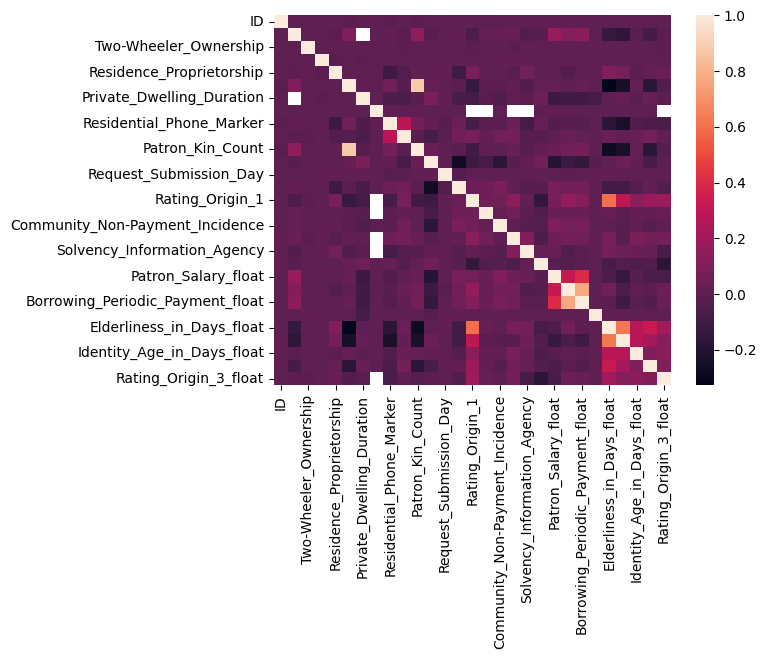

In [ ]:
sns.heatmap(df.corr())

In [ ]:
categorical_list = [x for x in categorical_list if x not in object_to_float]

## Univariate Analysis

### Categorical data

In [ ]:
categorical_list

['Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Customer_Vocation',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker',
 'Sort_of_Institution']

<Axes: ylabel='Customer_Revenue_Category'>

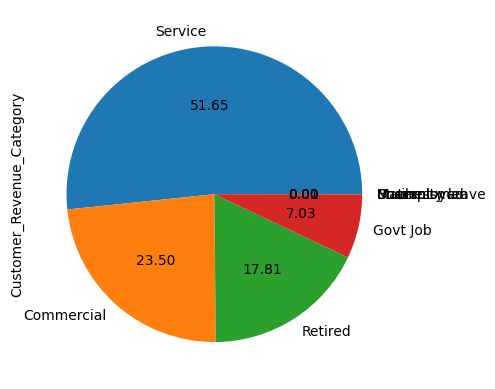

In [ ]:
df['Customer_Revenue_Category'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Patron_Academic_Qualification'>

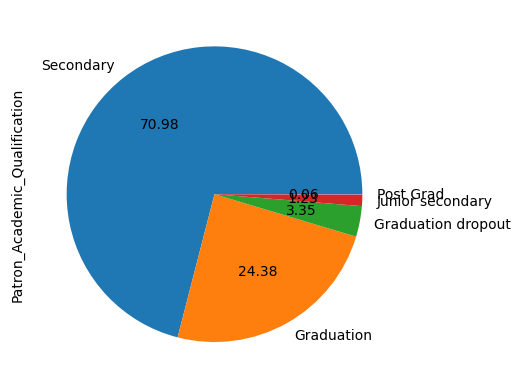

In [ ]:
df['Patron_Academic_Qualification'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Customer_Conjugal_State'>

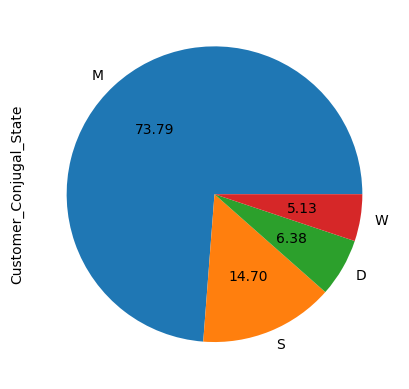

In [ ]:
df['Customer_Conjugal_State'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Patron_Sex'>

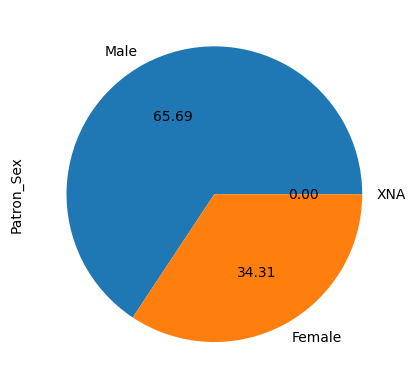

In [ ]:
df['Patron_Sex'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Borrowing_Agreement_Category'>

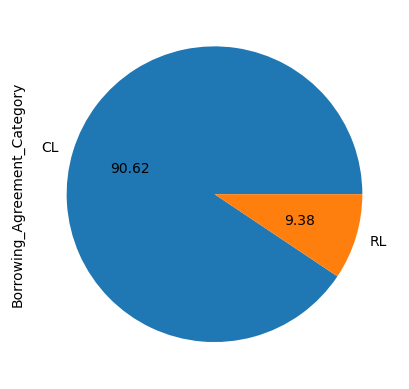

In [ ]:
df['Borrowing_Agreement_Category'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Customer_Living_Arrangement'>

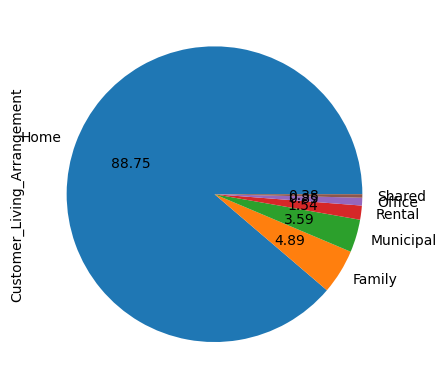

In [ ]:
df['Customer_Living_Arrangement'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Customer_Vocation'>

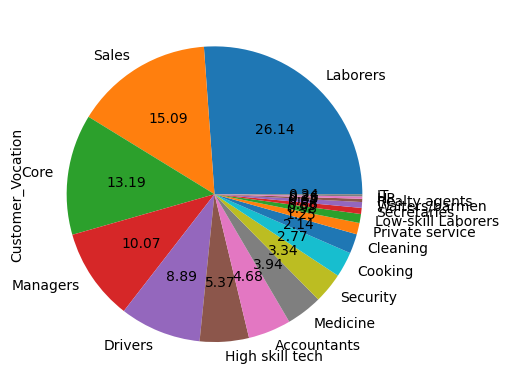

In [ ]:
df['Customer_Vocation'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Patron_Constant_Correspondence_Marker'>

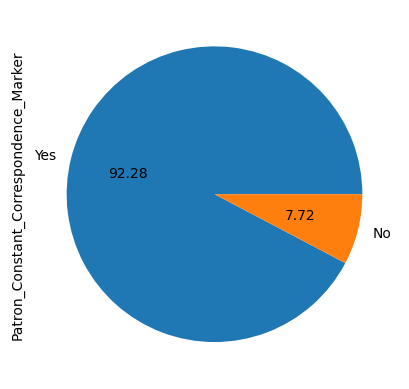

In [ ]:
df['Patron_Constant_Correspondence_Marker'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Customer_Professional_Communication_Marker'>

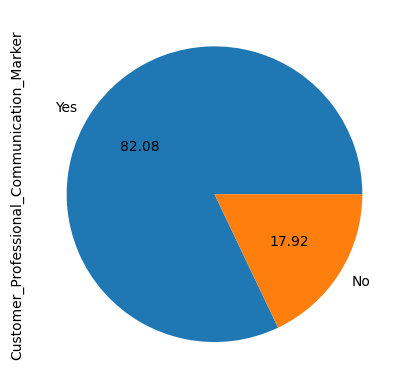

In [ ]:
df['Customer_Professional_Communication_Marker'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Sort_of_Institution'>

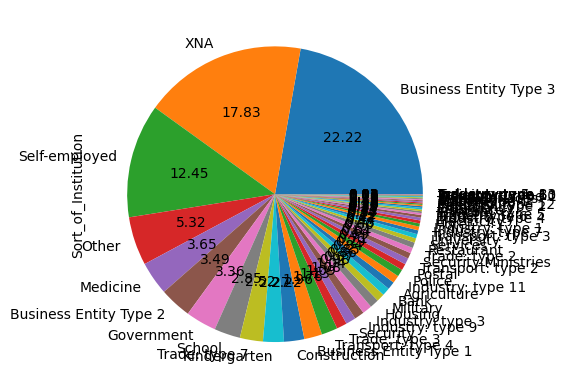

In [ ]:
df['Sort_of_Institution'].value_counts().plot(kind='pie', autopct='%.2f')

### Numerical analysis

In [ ]:
numerical_data = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [ ]:
numerical_data

['ID',
 'Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Offspring_Number',
 'Private_Dwelling_Duration',
 'Cellphone_Marker',
 'Residential_Phone_Marker',
 'Employment_Phone_Operation',
 'Patron_Kin_Count',
 'Customer_Urban_Area_Ranking',
 'Request_Submission_Day',
 'Request_Submission_Hour',
 'Rating_Origin_1',
 'Rating_Origin_2',
 'Community_Non-Payment_Incidence',
 'Telecommunication_Switch',
 'Solvency_Information_Agency',
 'Default',
 'Patron_Salary_float',
 'Loan_Capital_float',
 'Borrowing_Periodic_Payment_float',
 'Population_Fraction_by_Region_float',
 'Elderliness_in_Days_float',
 'Work_Duration_in_Days_float',
 'Identity_Age_in_Days_float',
 'Enlistment_Period_in_Days_float',
 'Rating_Origin_3_float']

#### histogram

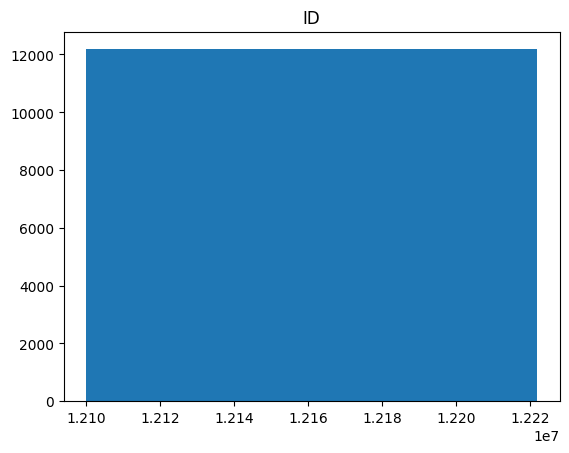

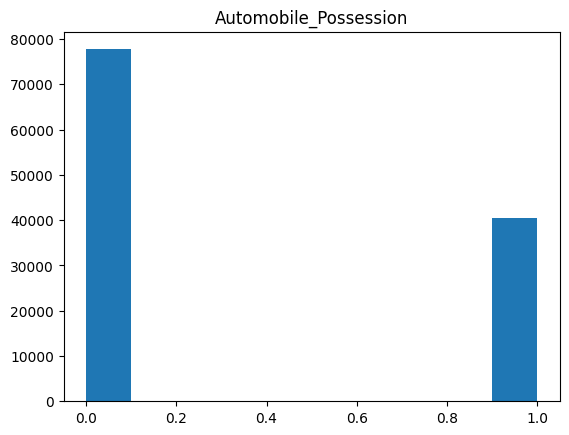

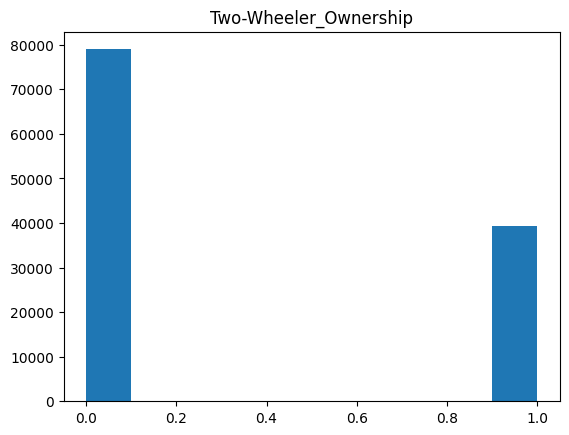

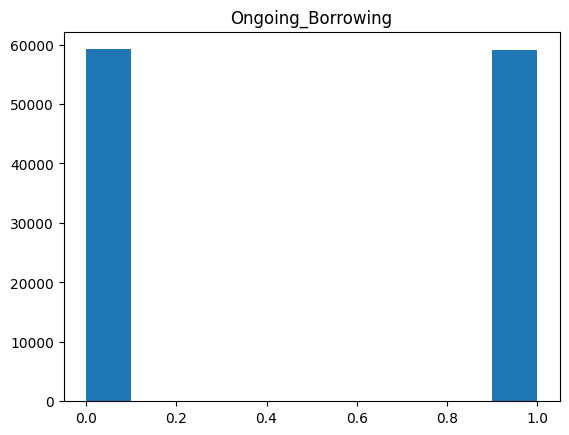

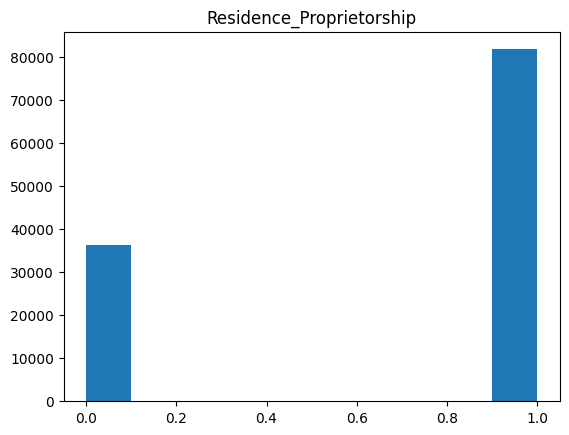

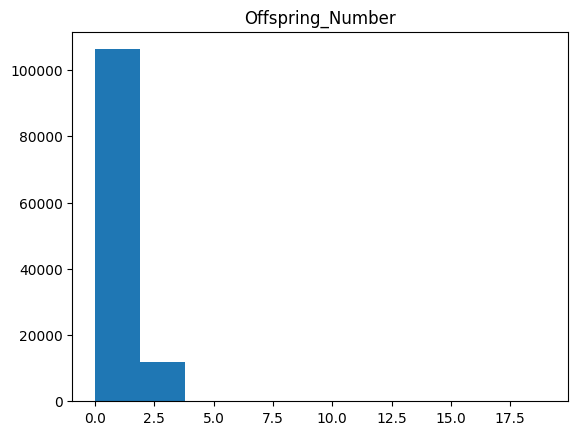

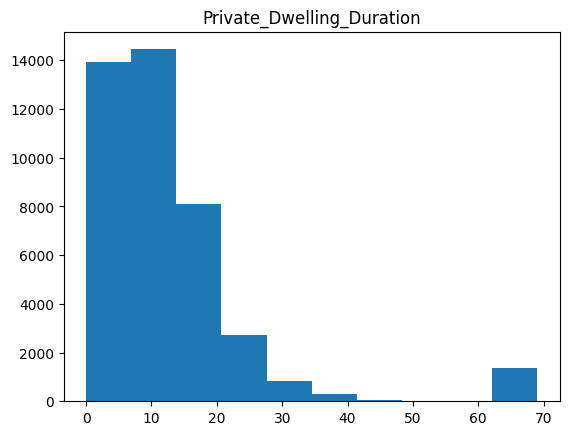

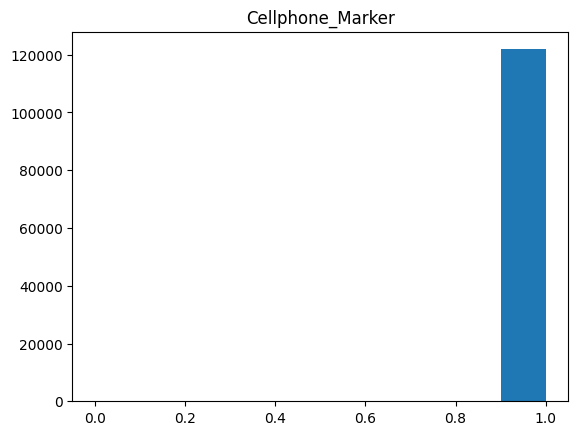

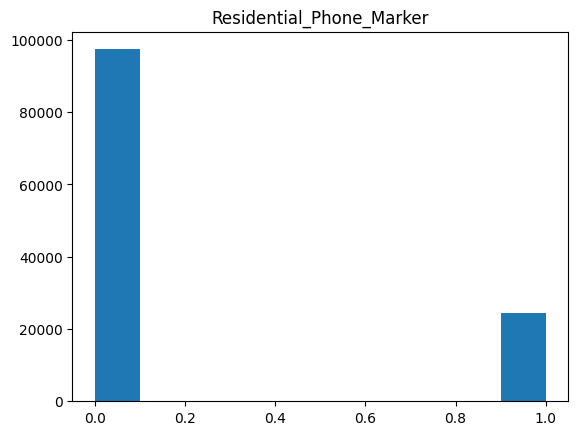

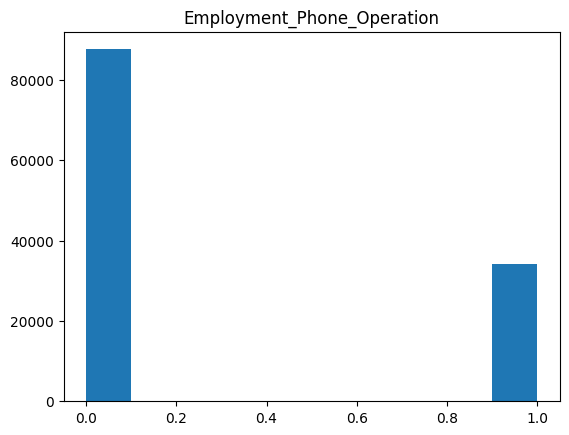

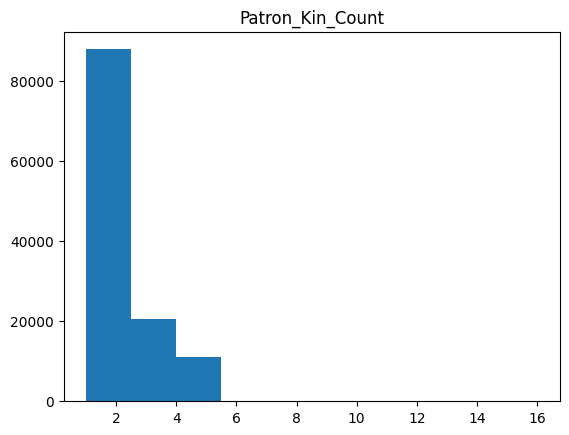

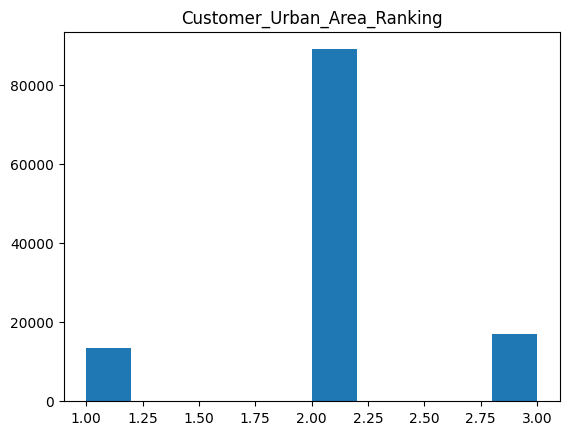

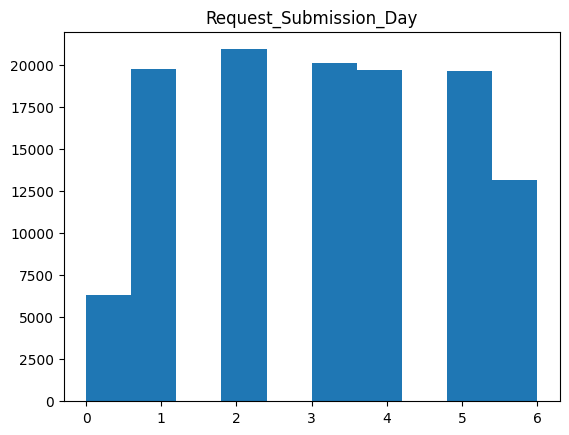

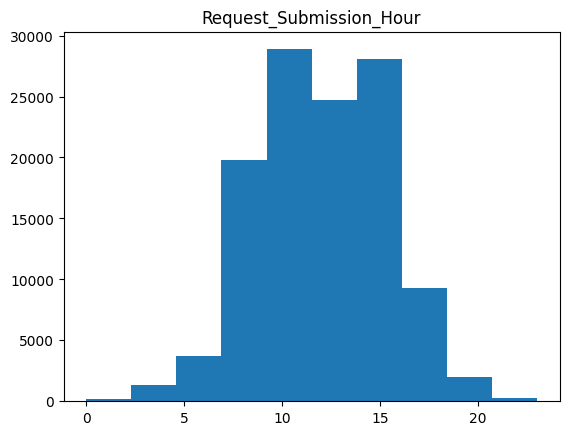

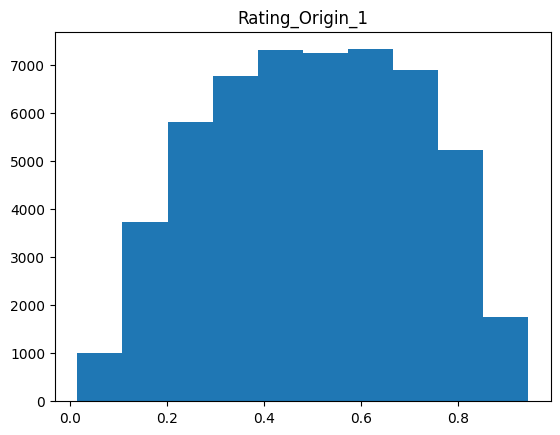

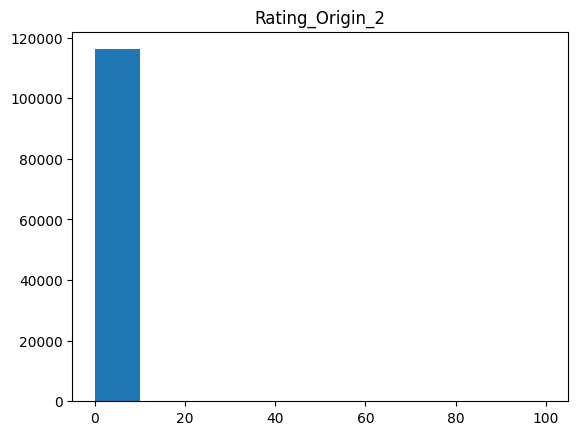

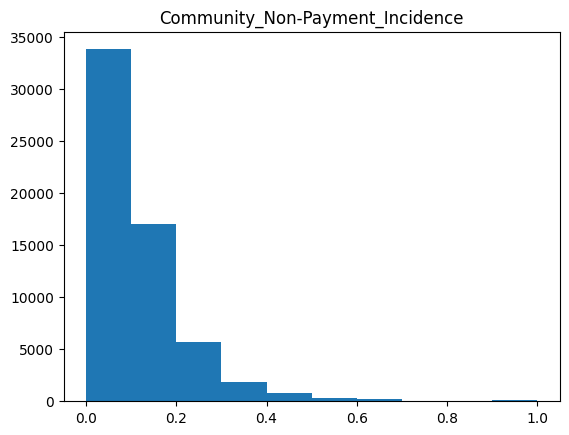

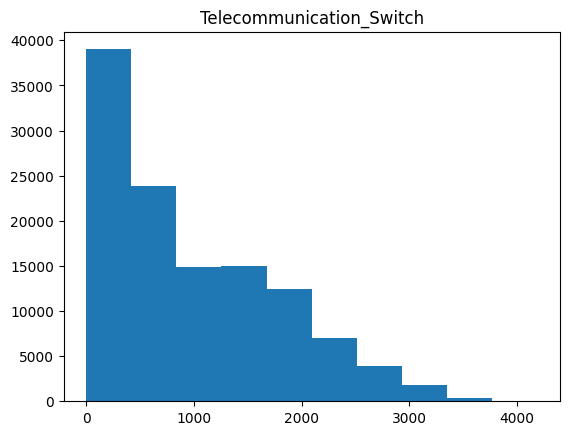

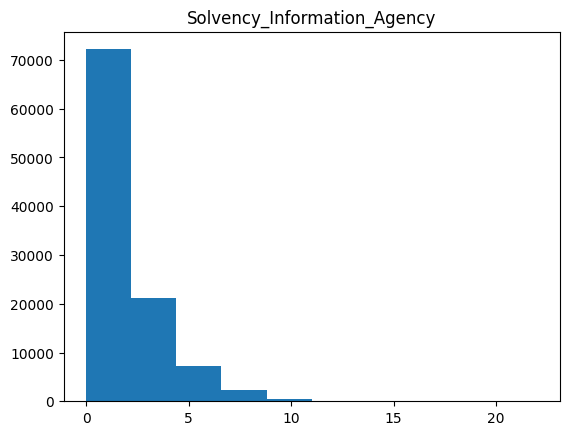

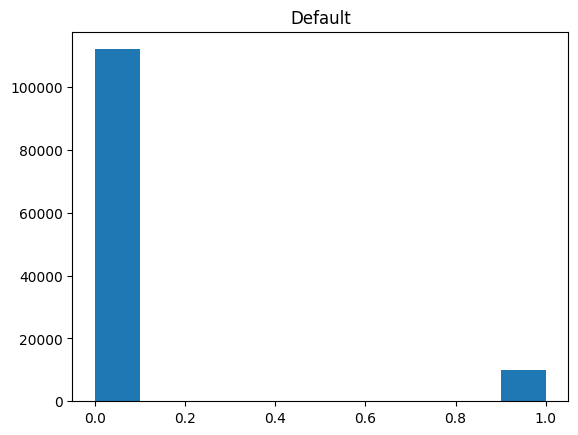

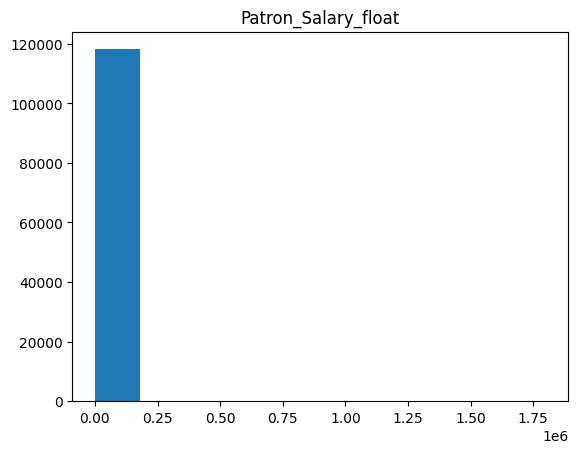

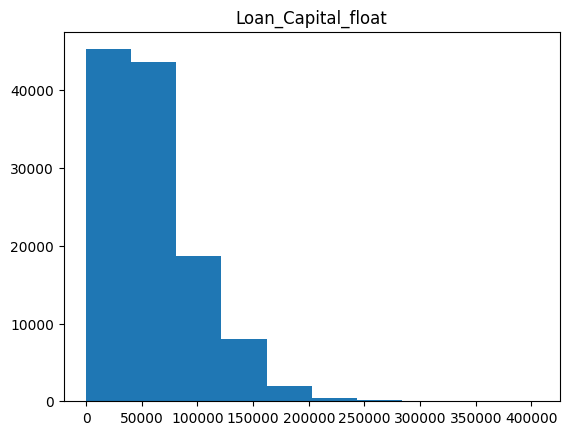

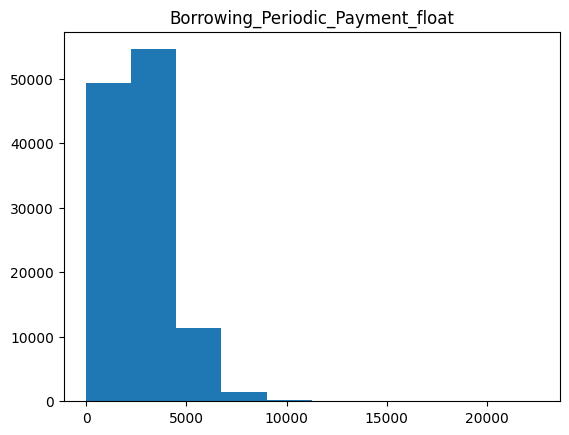

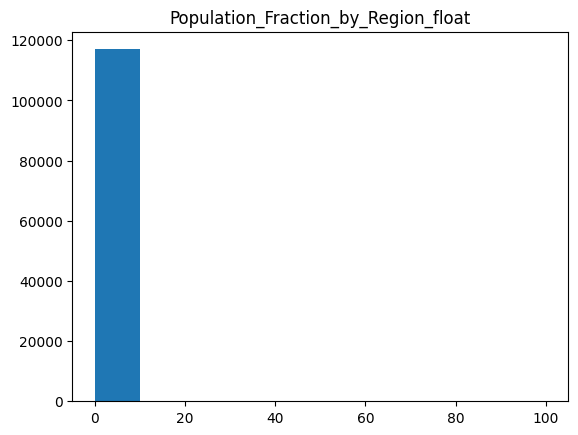

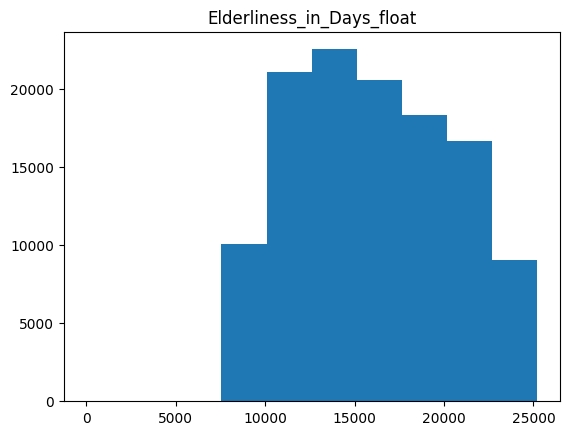

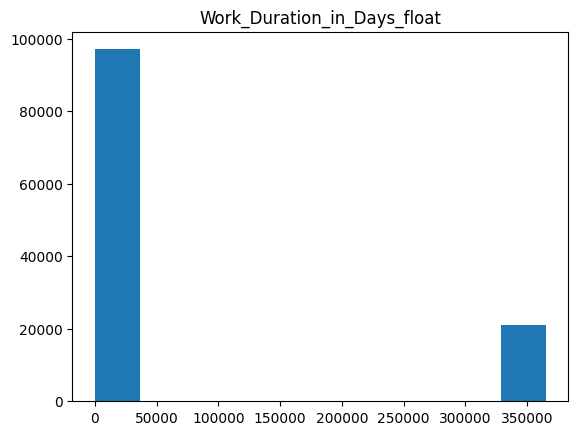

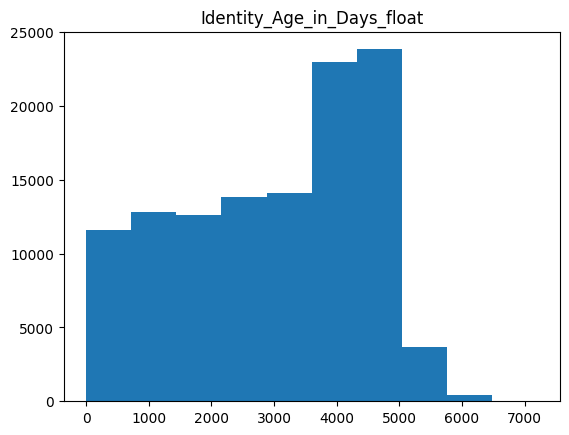

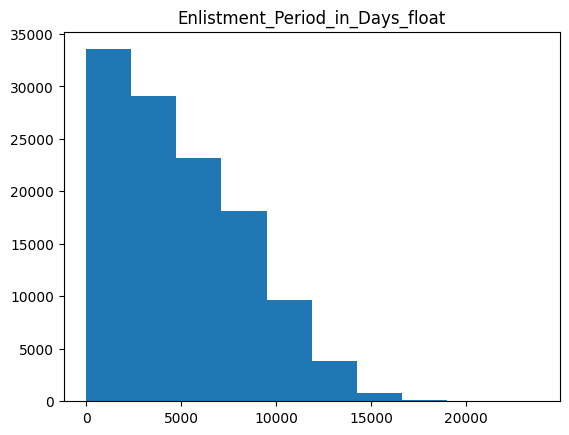

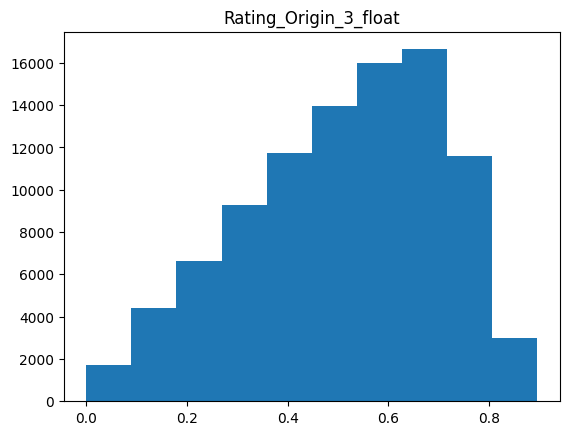

In [ ]:
for i in numerical_data:
  plt.hist(df[i])
  plt.title(i)
  plt.show()

### Multi Variate Analysis

#### Numerical VS Numerical

<Axes: xlabel='Work_Duration_in_Days_float', ylabel='Elderliness_in_Days_float'>

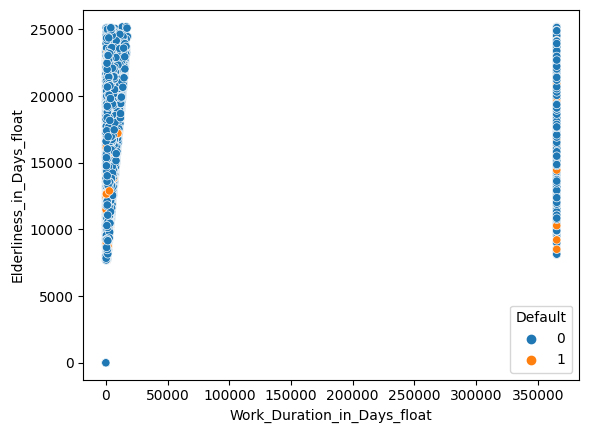

In [ ]:
sns.scatterplot(data=df, x='Work_Duration_in_Days_float', y='Elderliness_in_Days_float', hue="Default")

<Axes: xlabel='Loan_Capital_float', ylabel='Borrowing_Periodic_Payment_float'>

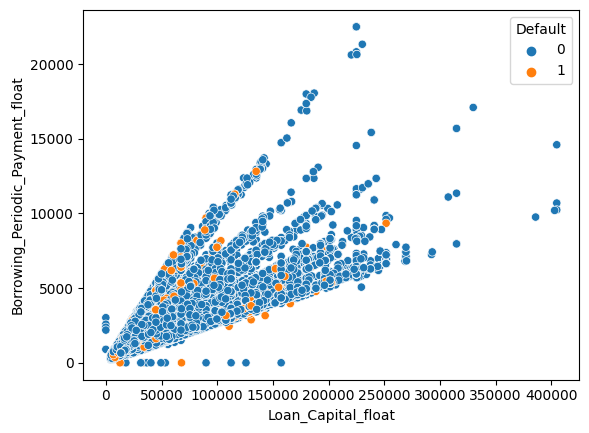

In [ ]:
sns.scatterplot(data=df, x='Loan_Capital_float', y='Borrowing_Periodic_Payment_float', hue="Default")

<Axes: xlabel='Offspring_Number', ylabel='Patron_Kin_Count'>

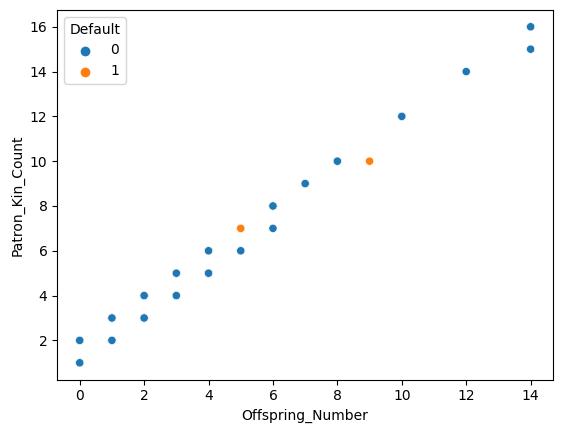

In [ ]:
sns.scatterplot(data=df, x='Offspring_Number', y='Patron_Kin_Count', hue="Default")

<Axes: xlabel='Cellphone_Marker', ylabel='Rating_Origin_2'>

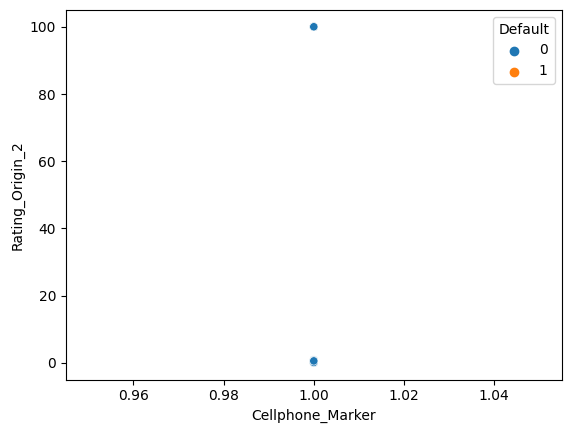

In [ ]:
sns.scatterplot(data=df, x='Cellphone_Marker', y='Rating_Origin_2', hue="Default")

<Axes: xlabel='Cellphone_Marker', ylabel='Telecommunication_Switch'>

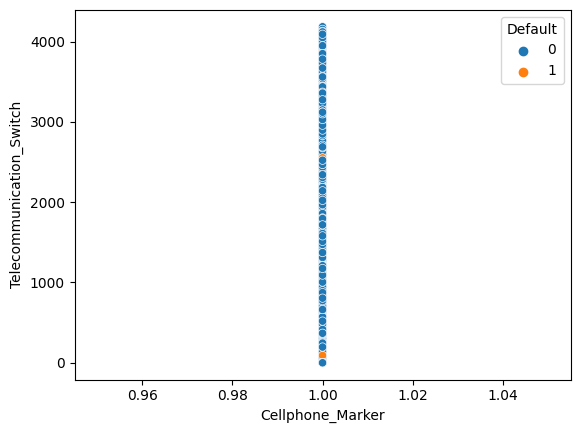

In [ ]:
sns.scatterplot(data=df, x='Cellphone_Marker', y='Telecommunication_Switch', hue="Default")

####Categorical - Categorical

In [ ]:
categorical_list

['Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Customer_Vocation',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker',
 'Sort_of_Institution']

In [ ]:
for i in categorical_list:
  print(i, "->", df[i].isnull().mean())

Customer_Revenue_Category -> 0.030371914390756302
Patron_Academic_Qualification -> 0.029912355567226892
Customer_Conjugal_State -> 0.028500853466386554
Patron_Sex -> 0.01980206144957983
Borrowing_Agreement_Category -> 0.029961594012605043
Customer_Living_Arrangement -> 0.03025702468487395
Customer_Vocation -> 0.3400324973739496
Patron_Constant_Correspondence_Marker -> 0.0
Customer_Professional_Communication_Marker -> 0.0
Sort_of_Institution -> 0.029616924894957982


In [ ]:
categorical_list.remove('Customer_Vocation')

In [ ]:
df.drop(['Customer_Vocation'], axis=1, inplace=True)

In [ ]:
for i in categorical_list:
  df[i].fillna('Missing', inplace=True)

In [ ]:
sample_df = df.groupby('Default').apply(
    lambda x: x.sample(frac=0.0020)
)

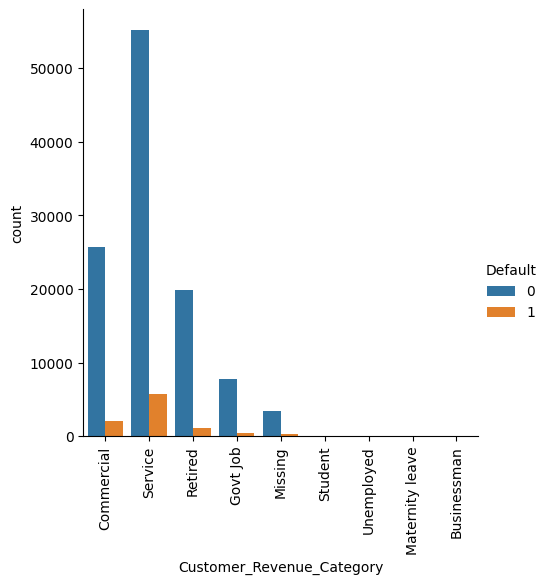

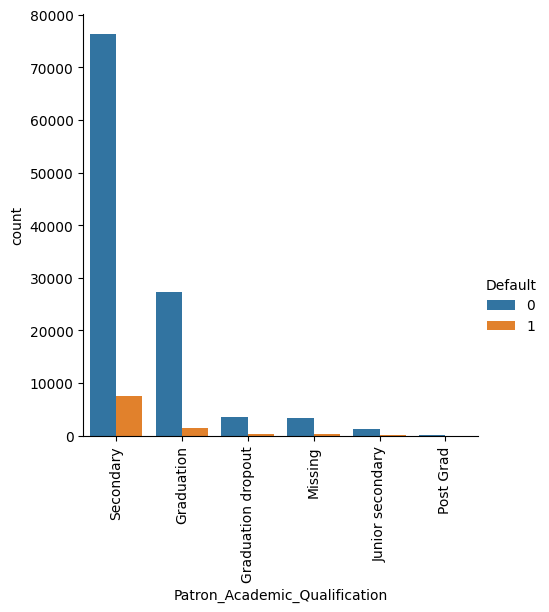

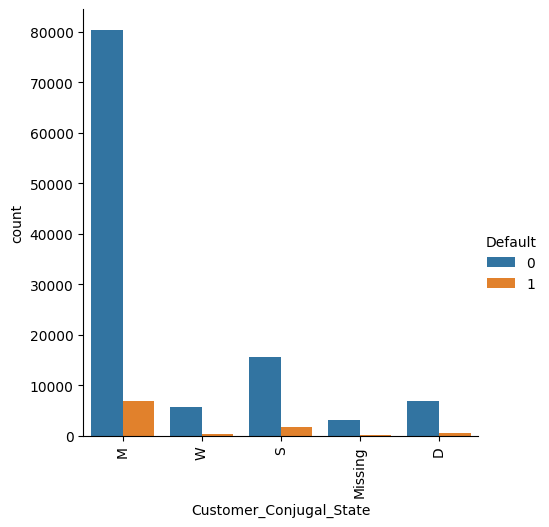

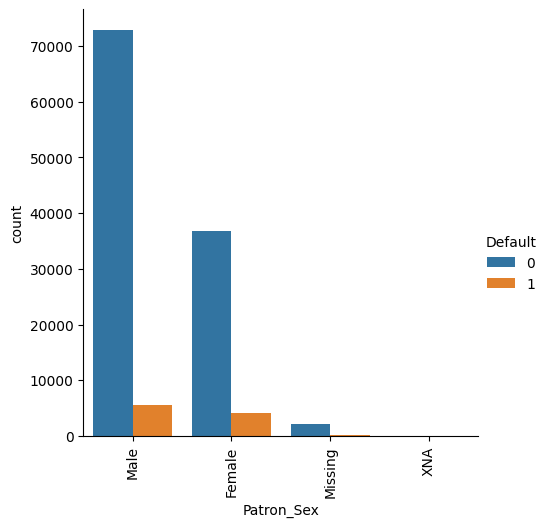

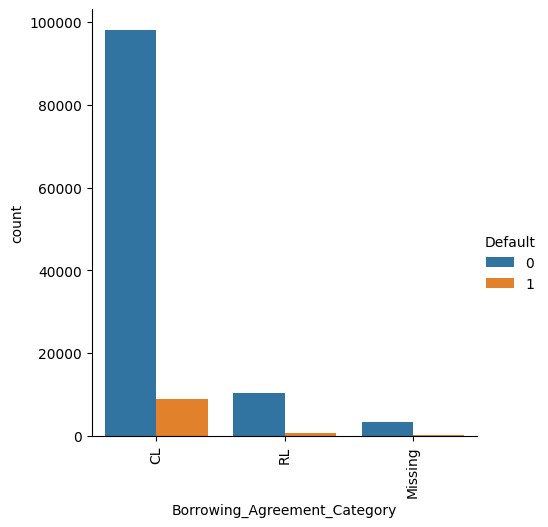

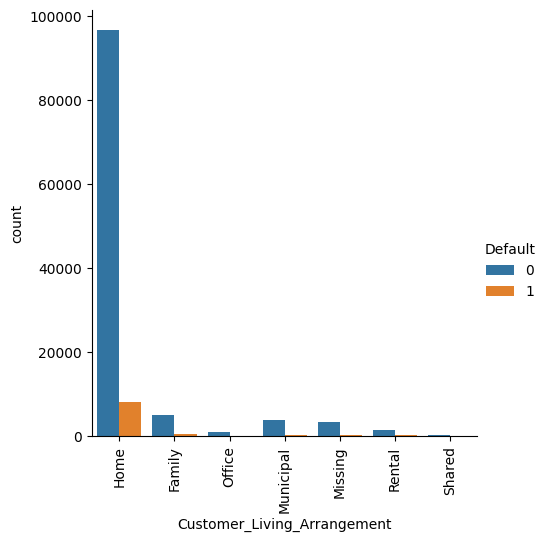

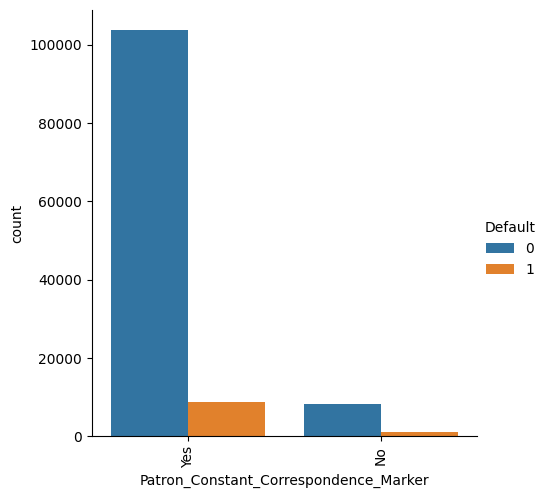

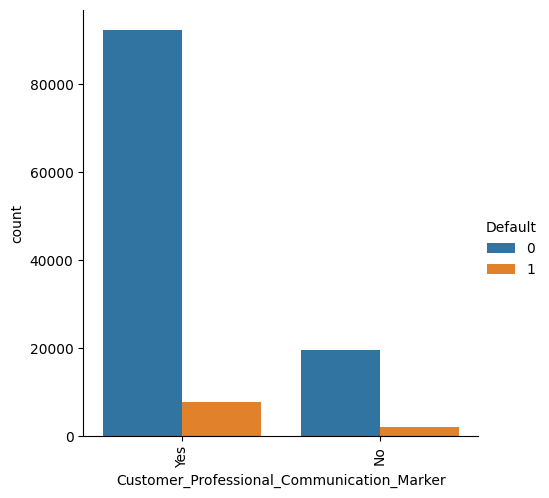

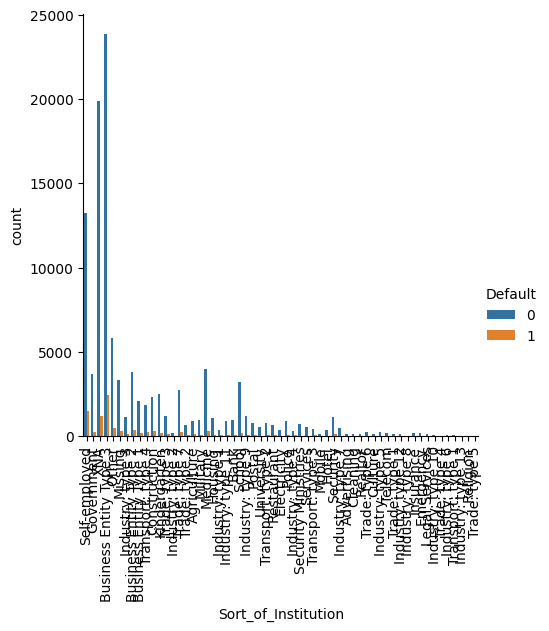

In [ ]:
for i in categorical_list:
  sns.catplot(x = i, hue="Default", data=df, kind="count").set_xticklabels(rotation=90)
  plt.show()

There are some categorical variables whose data types are in int

In [ ]:
num_categorical = []
for i in numerical_data:
  if df[i].nunique() <= 24:
    num_categorical.append(i)

In [ ]:
num_categorical.remove('Default')

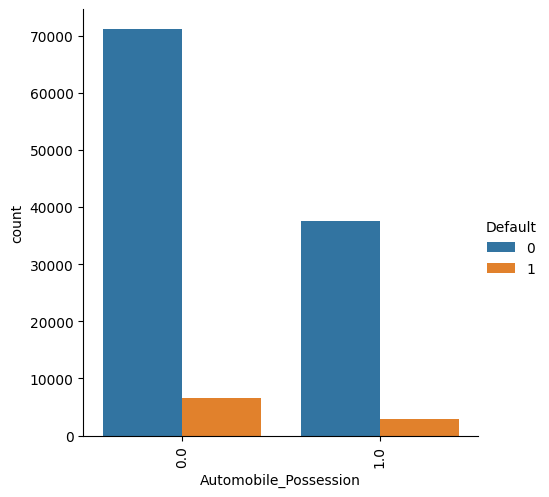

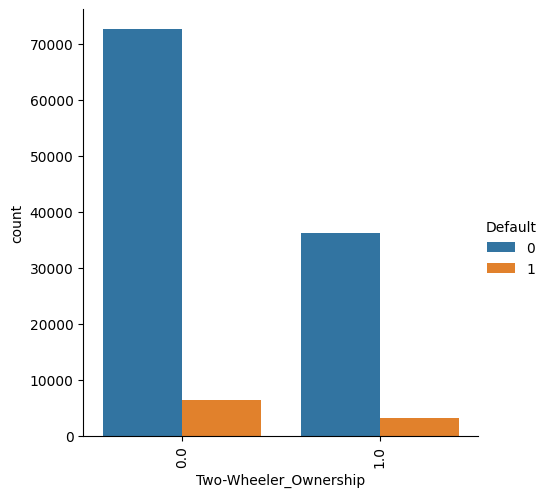

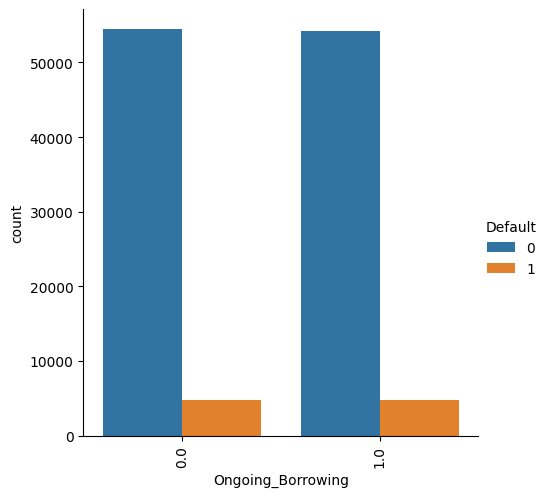

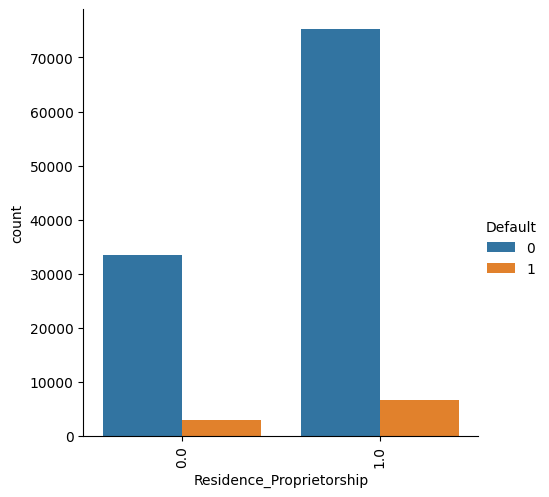

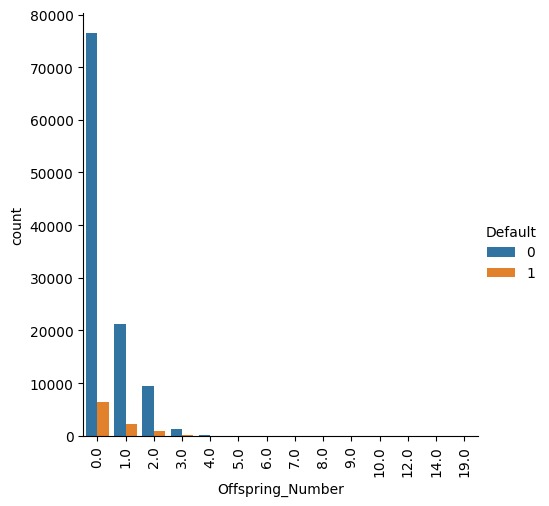

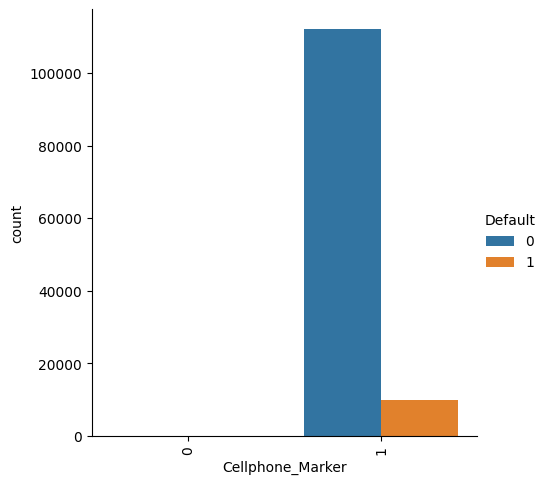

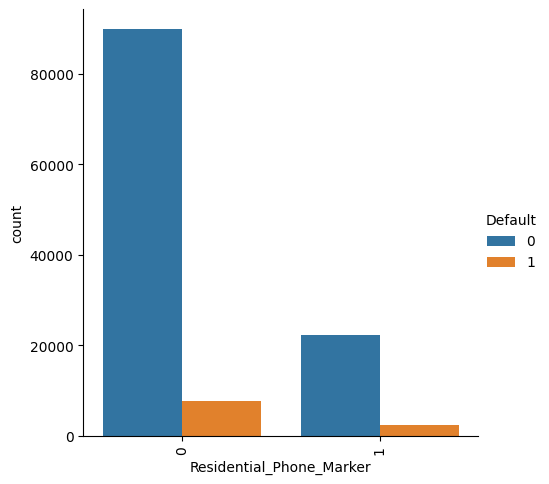

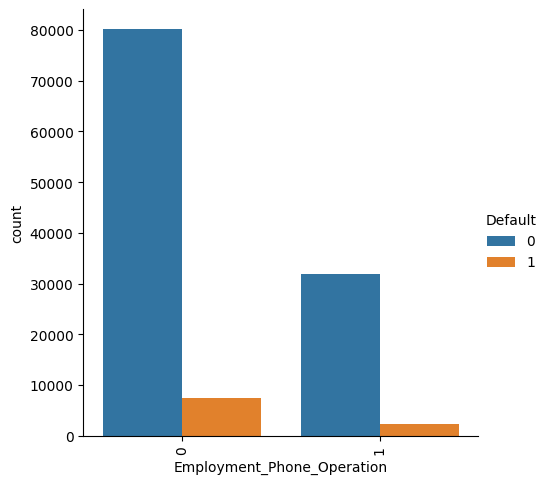

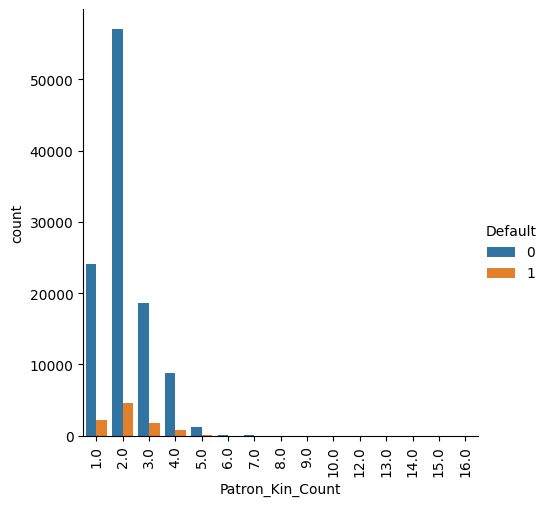

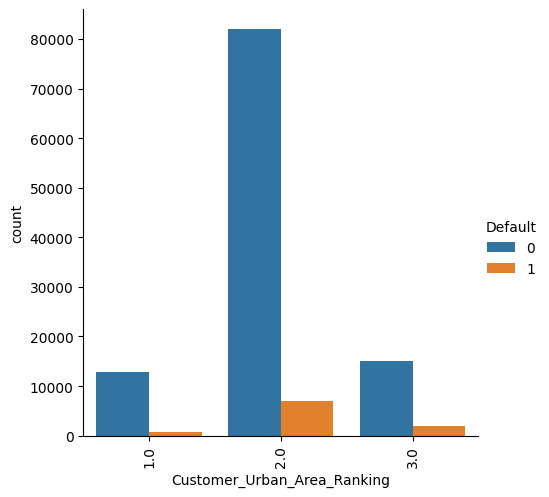

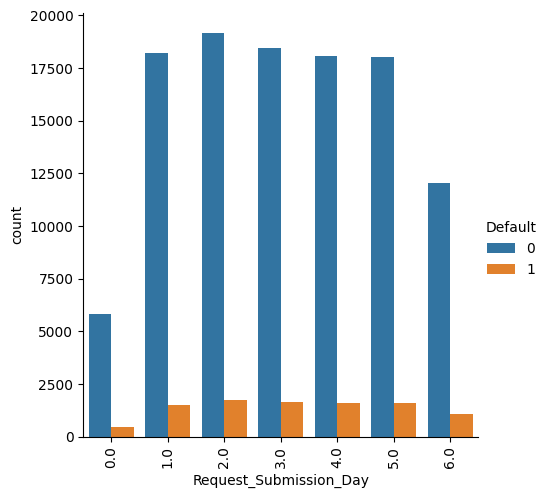

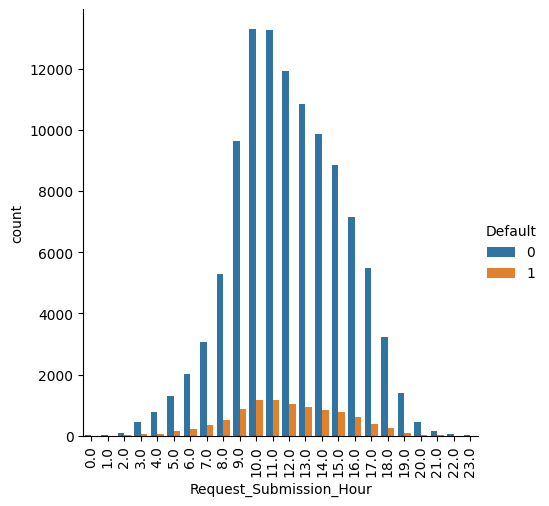

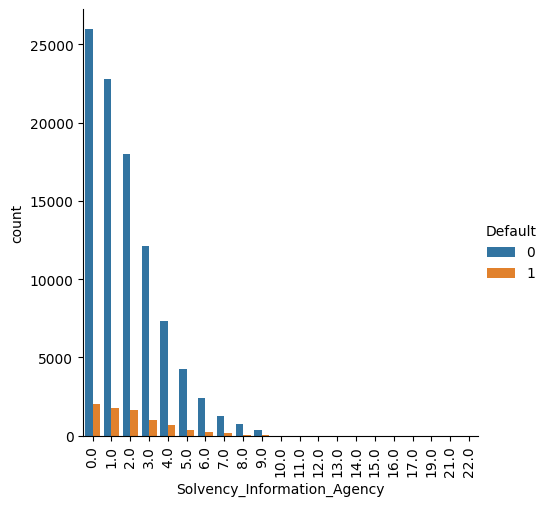

In [ ]:
for i in num_categorical:
  sns.catplot(x = i, hue="Default", data=df, kind="count").set_xticklabels(rotation=90)
  plt.show()

####Categorical vs Numerical

Here the Categorical data is the 'Default' column and numerical data are continuous numerical variables

In [ ]:
for i in numerical_data:
  print(i, '->',df[i].isnull().mean())

ID -> 0.0
Automobile_Possession -> 0.029387145483193277
Two-Wheeler_Ownership -> 0.02974002100840336
Ongoing_Borrowing -> 0.02983029149159664
Residence_Proprietorship -> 0.030043658088235295
Offspring_Number -> 0.029854910714285716
Private_Dwelling_Duration -> 0.6572922137605042
Cellphone_Marker -> 0.0
Residential_Phone_Marker -> 0.0
Employment_Phone_Operation -> 0.0
Patron_Kin_Count -> 0.019777442226890755
Customer_Urban_Area_Ranking -> 0.01976923581932773
Request_Submission_Day -> 0.01992515756302521
Request_Submission_Hour -> 0.030060070903361345
Rating_Origin_1 -> 0.5648880646008403
Rating_Origin_2 -> 0.046661633403361345
Community_Non-Payment_Incidence -> 0.5082064075630253
Telecommunication_Switch -> 0.03006827731092437
Solvency_Information_Agency -> 0.1521467962184874
Default -> 0.0
Patron_Salary_float -> 0.02960051207983193
Loan_Capital_float -> 0.029805672268907565
Borrowing_Periodic_Payment_float -> 0.03948923319327731
Population_Fraction_by_Region_float -> 0.0398585215336134

In [ ]:
numerical_data.remove('Private_Dwelling_Duration')
numerical_data.remove('Rating_Origin_1')
numerical_data.remove('Community_Non-Payment_Incidence')

In [ ]:
numerical_data.remove('Default')

In [ ]:
numerical_data.remove('ID')

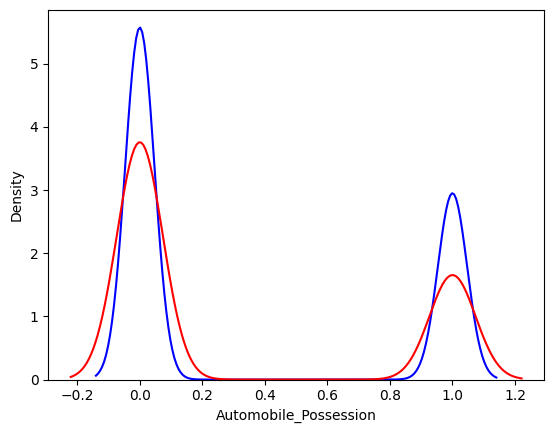

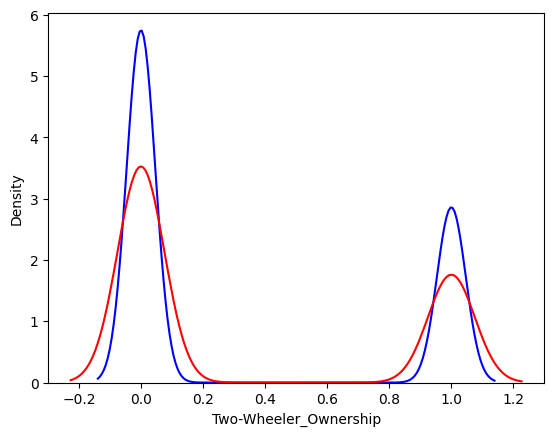

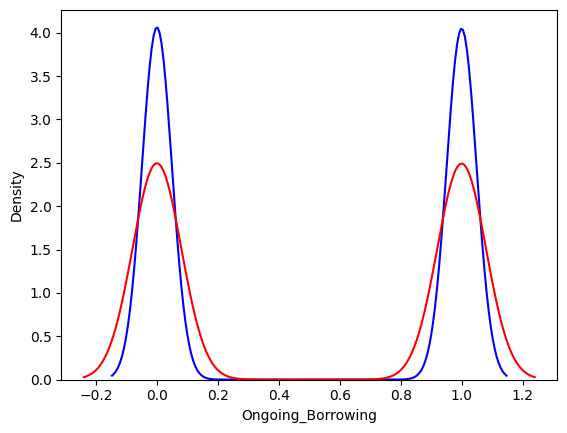

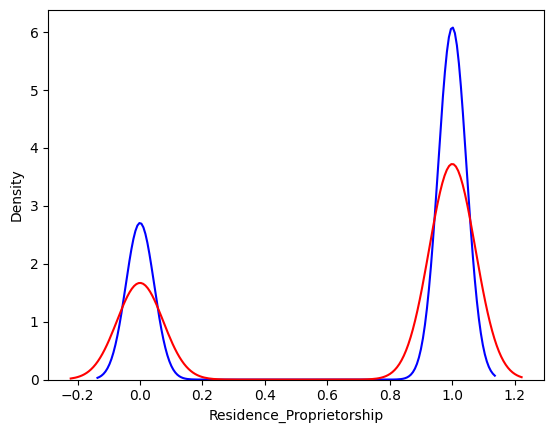

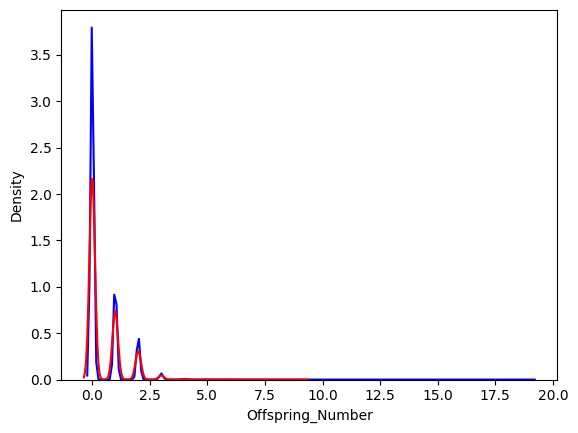

<ipython-input-164-4fd253e75133>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Default']==1][i], color='red', cumulative=False)


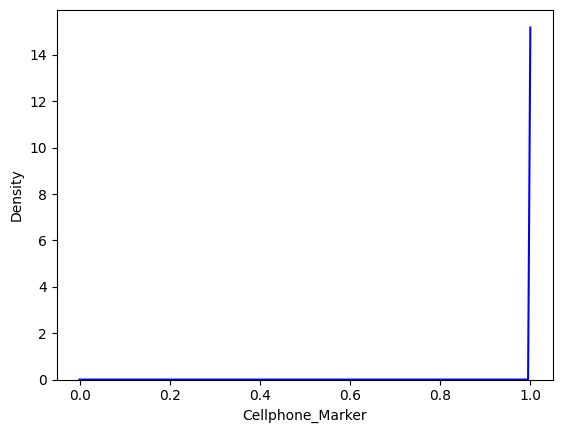

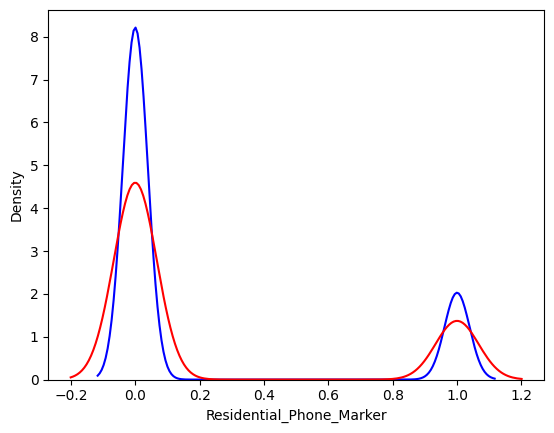

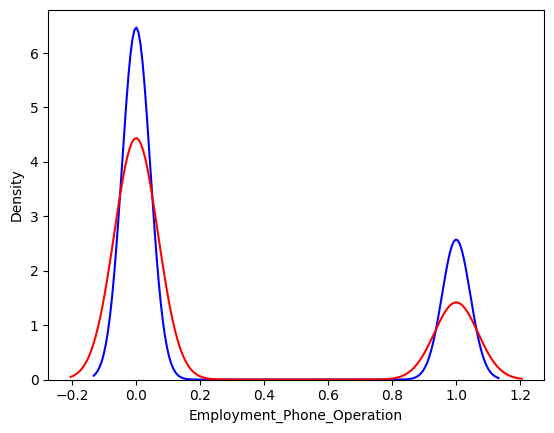

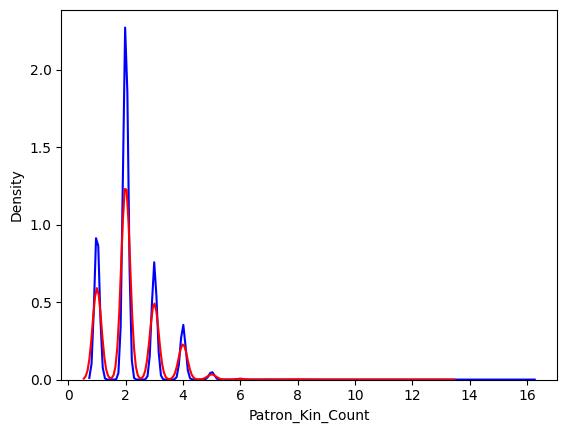

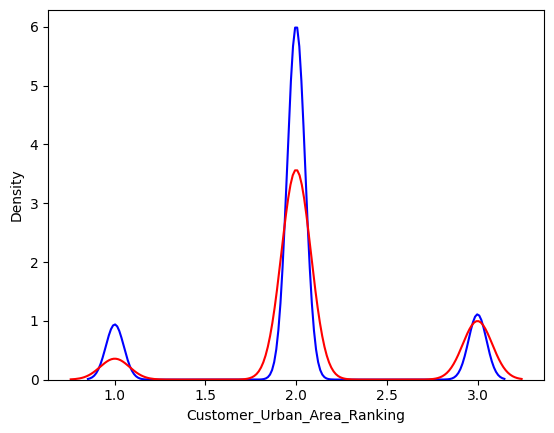

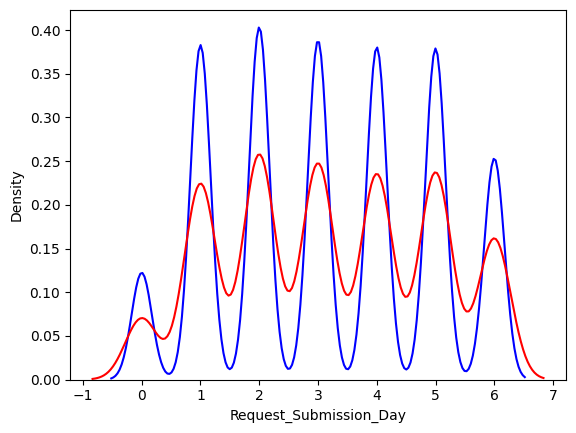

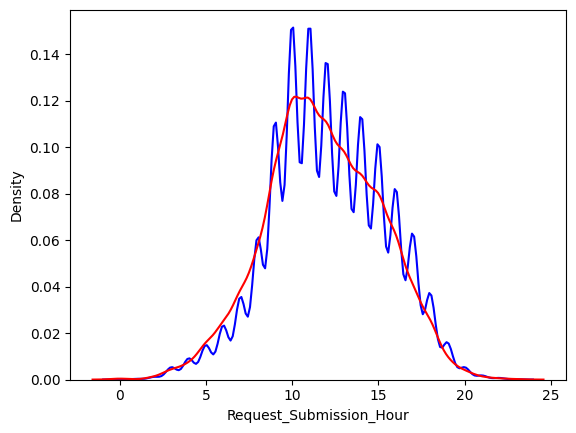

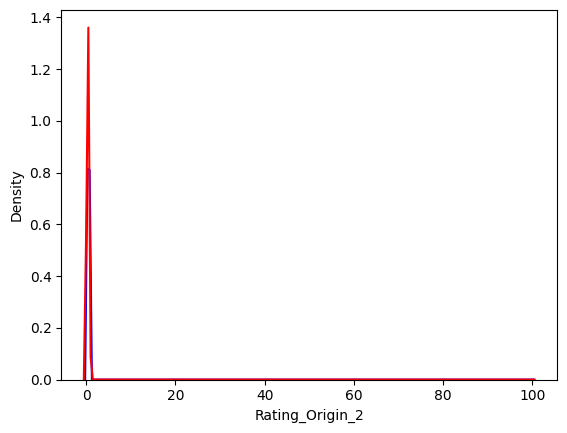

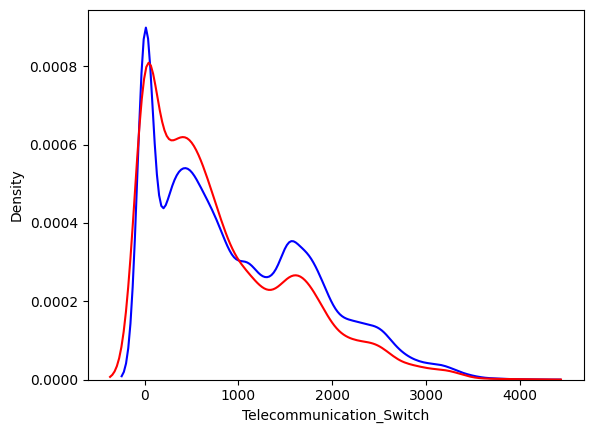

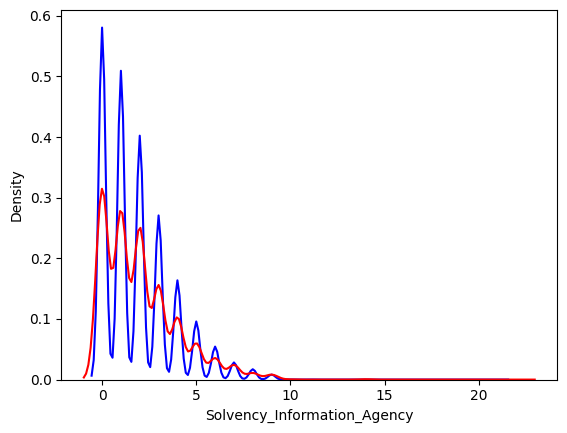

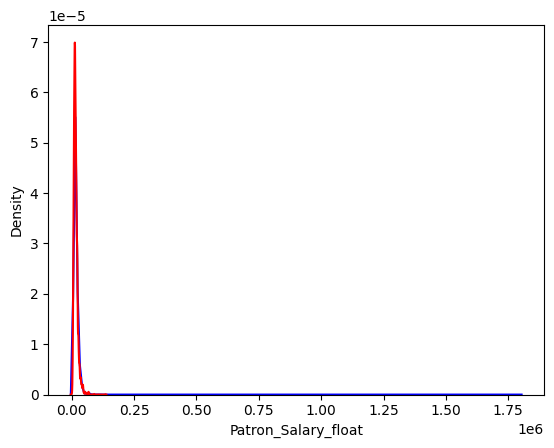

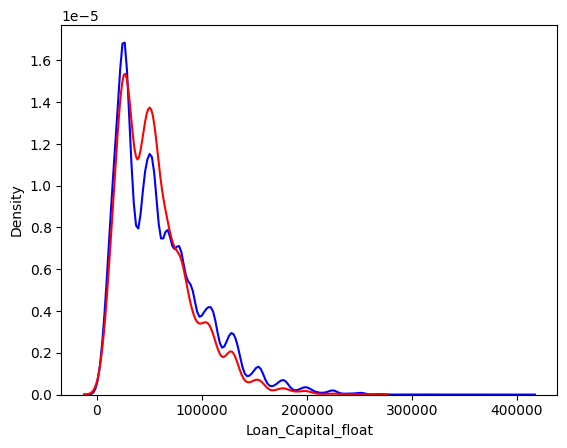

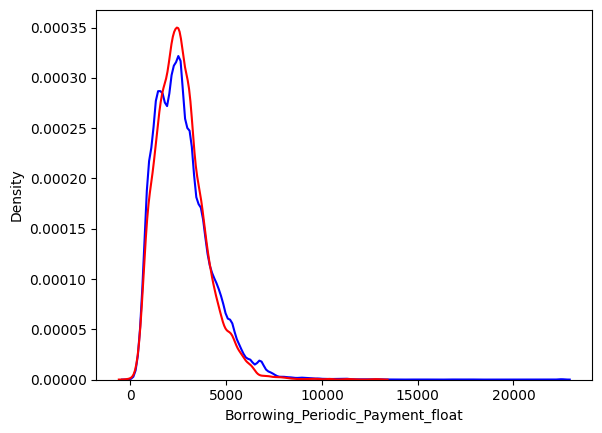

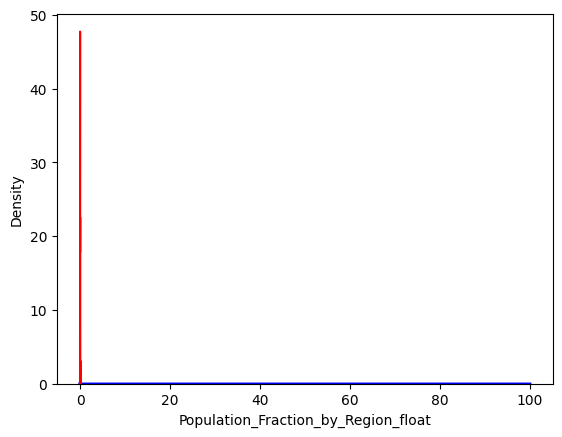

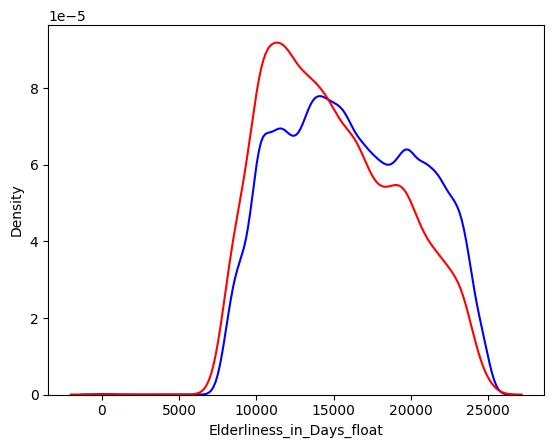

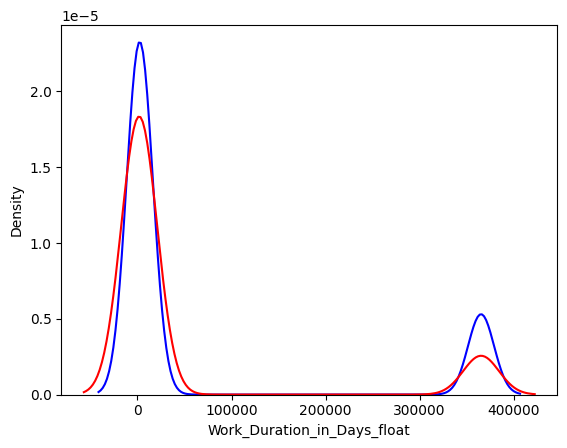

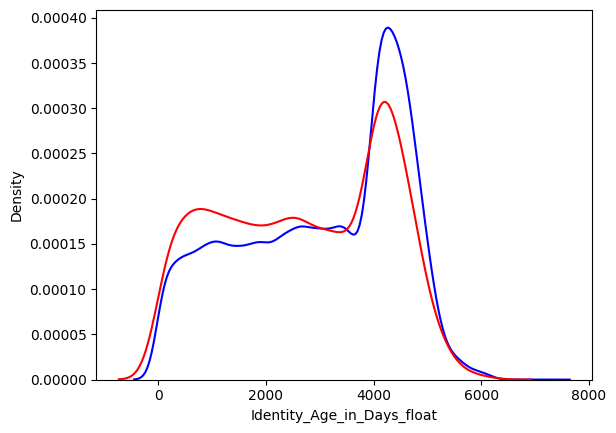

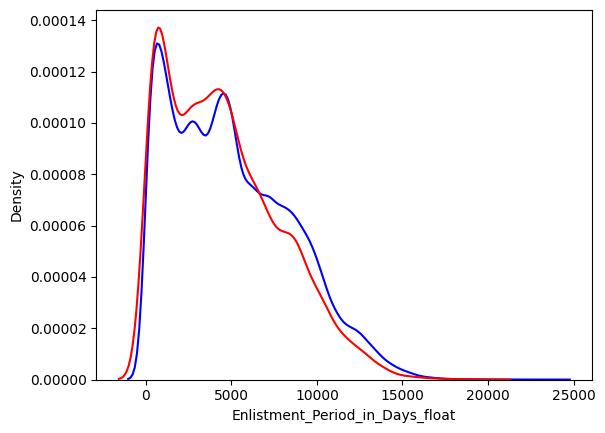

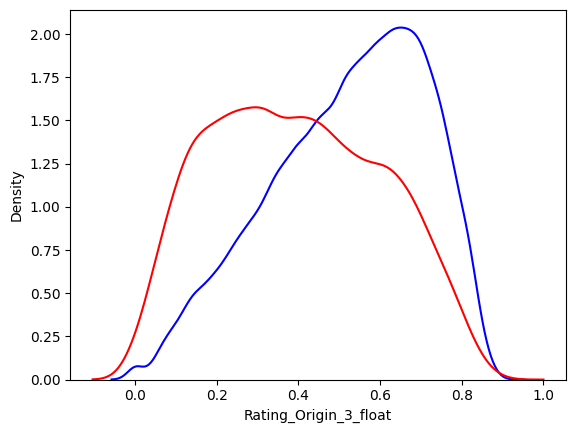

In [ ]:
for i in numerical_data:
  sns.kdeplot(df[df['Default']==0][i], color='blue', cumulative=False)
  sns.kdeplot(df[df['Default']==1][i], color='red', cumulative=False)
  plt.show()

## Handling Missing Features

###Handlling Missing Data in Numerical Column (Continuous Numbers)

In [ ]:
continuous_feature = []
for i in numerical_data:
  if i not in num_categorical:
    continuous_feature.append(i)

In [ ]:
continuous_feature

['Rating_Origin_2',
 'Telecommunication_Switch',
 'Patron_Salary_float',
 'Loan_Capital_float',
 'Borrowing_Periodic_Payment_float',
 'Population_Fraction_by_Region_float',
 'Elderliness_in_Days_float',
 'Work_Duration_in_Days_float',
 'Identity_Age_in_Days_float',
 'Enlistment_Period_in_Days_float',
 'Rating_Origin_3_float']

####Handling missing values in Continuous_feature comlumns

Here we are using iterative imputer to predict the features in the missing columns.

In [ ]:
imp = IterativeImputer(random_state=42, n_nearest_features=2)

In [ ]:
imp.fit(df[continuous_feature])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(n_nearest_features=2, random_state=42)

In [ ]:
df_transformed = imp.transform(df[continuous_feature])

In [ ]:
df_transformed = pd.DataFrame(df_transformed, columns = continuous_feature)

In [ ]:
df[continuous_feature] = df_transformed

Checking if the distribution has changed after the imputation. NOTE: for consistency the distribution before and after the imputation do not change.

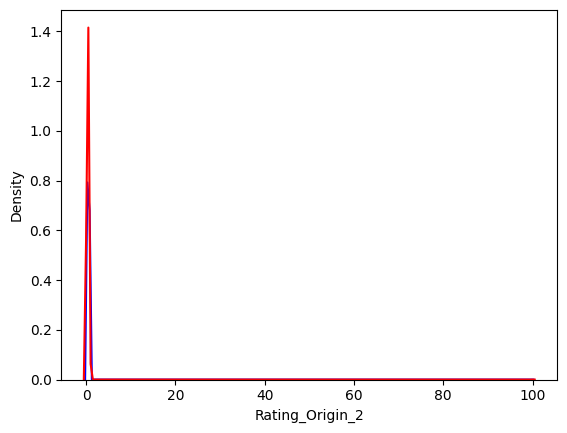

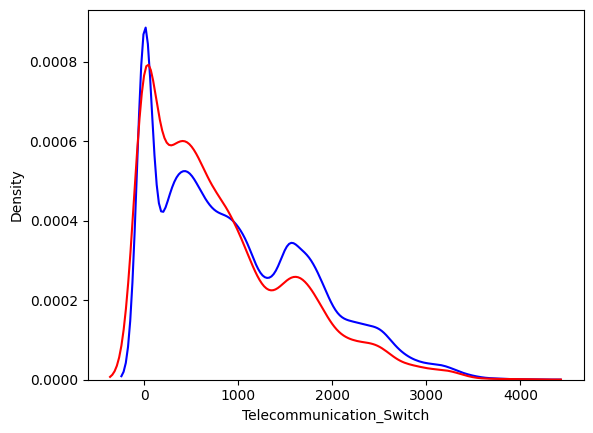

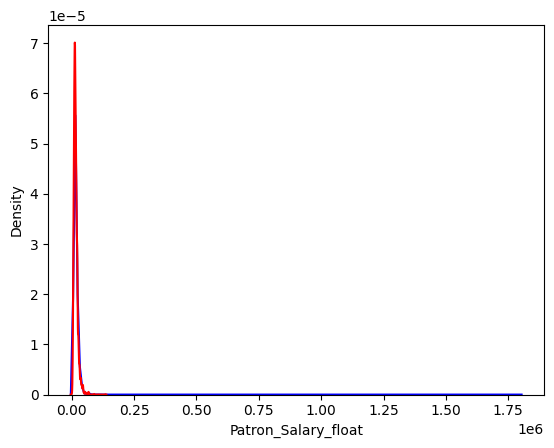

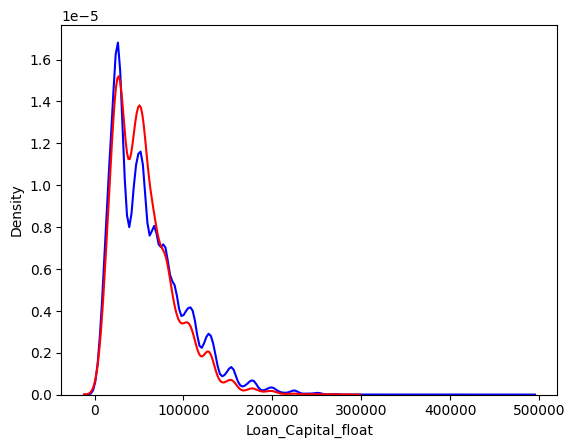

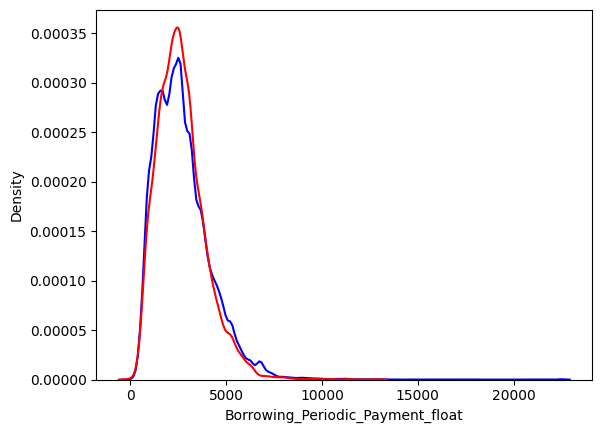

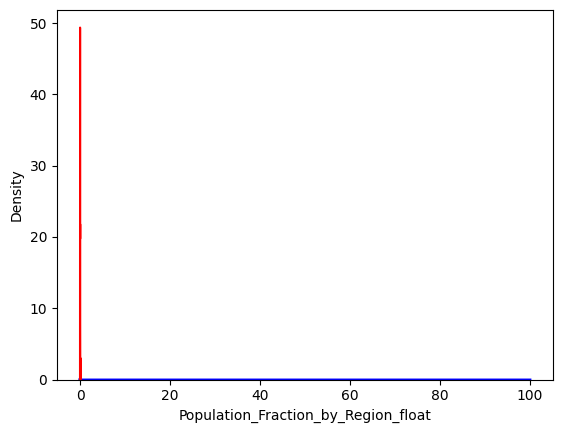

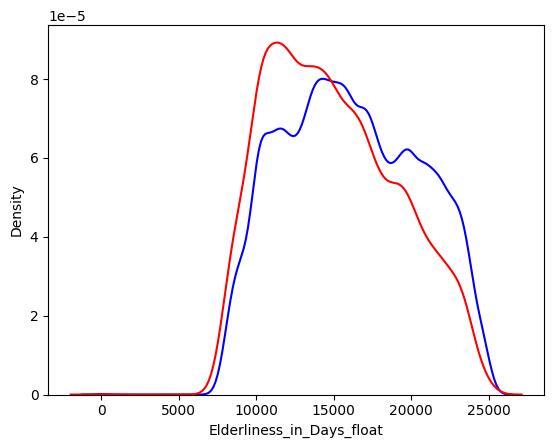

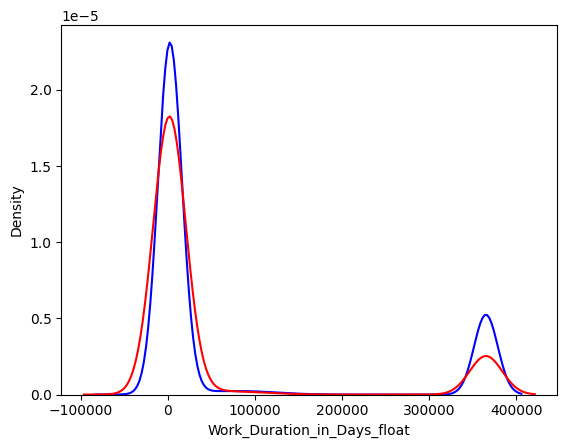

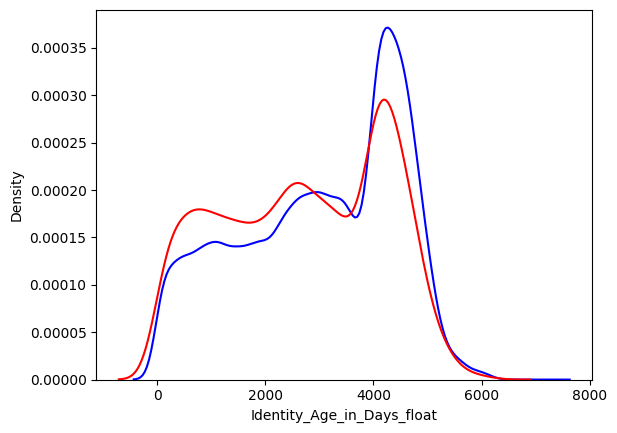

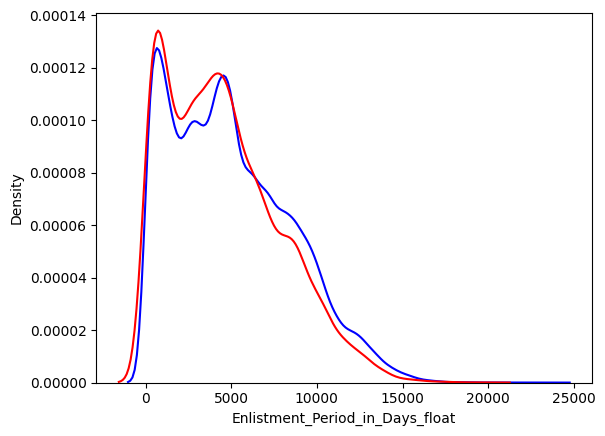

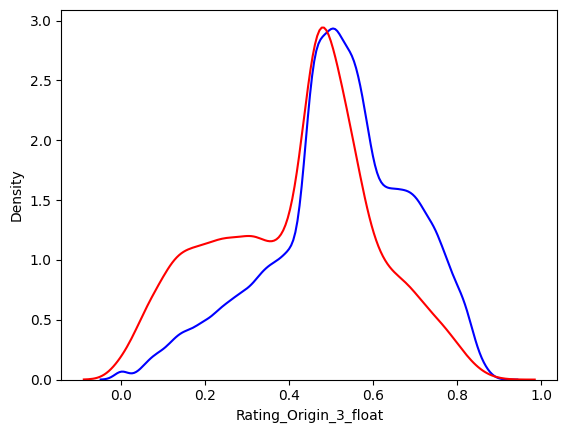

In [ ]:
for i in continuous_feature:
  sns.kdeplot(df[df['Default']==0][i], color='blue', cumulative=False)
  sns.kdeplot(df[df['Default']==1][i], color='red', cumulative=False)
  plt.show()

###Handling missing in categorical data which has data type as int/float

In [ ]:
df[num_categorical]=df[num_categorical].fillna(100)

In [ ]:
df[num_categorical].isnull().mean()

Automobile_Possession          0.0
Two-Wheeler_Ownership          0.0
Ongoing_Borrowing              0.0
Residence_Proprietorship       0.0
Offspring_Number               0.0
Cellphone_Marker               0.0
Residential_Phone_Marker       0.0
Employment_Phone_Operation     0.0
Patron_Kin_Count               0.0
Customer_Urban_Area_Ranking    0.0
Request_Submission_Day         0.0
Request_Submission_Hour        0.0
Solvency_Information_Agency    0.0
dtype: float64

###Removing the columns that have more than 30% rows empty

In [ ]:
df = df.drop(['Private_Dwelling_Duration', 'Rating_Origin_1', 'Community_Non-Payment_Incidence'],axis=1)

##Feature Selection

###Feature Selection in Continuous Numerical Variable

<Axes: >

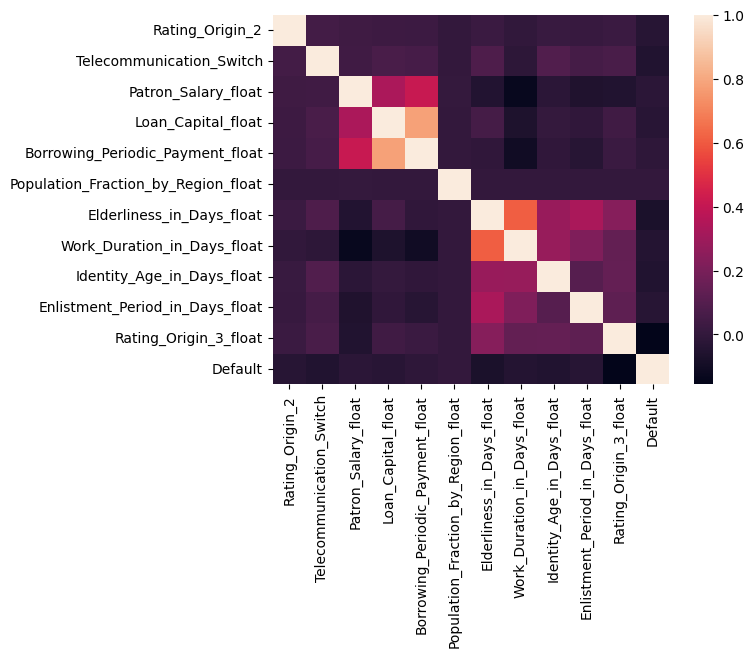

In [ ]:
sns.heatmap(df[continuous_feature+['Default']].corr())

By observing the above correlation table, we can drop: Borrowing_Periodic_Payment_float, Elderliness_in_Days_float columns

In [ ]:
df = df.drop(['Borrowing_Periodic_Payment_float','Elderliness_in_Days_float'], axis=1)

###Categorical Variables

####CHI sq stats for categorical feature

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
score = []
for i in categorical_list:
  ct = pd.crosstab(df['Default'],df[i])
  p_value = chi2_contingency(ct)[1]
  score.append(p_value)

In [ ]:
categorical_list

['Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker',
 'Sort_of_Institution']

In [ ]:
score

[9.475417248809293e-87,
 5.573250447621169e-102,
 3.534203147821267e-18,
 4.718672202069367e-68,
 3.772628162836873e-20,
 1.3326920056195284e-29,
 1.2990426317640464e-49,
 1.7604342055180362e-22,
 2.296894191312875e-105]

In [ ]:
categorical_imp = ['Patron_Sex','Customer_Revenue_Category','Patron_Academic_Qualification','Sort_of_Institution']

In [ ]:
score=[]
for i in categorical_list:
  ct = pd.crosstab(df['Patron_Academic_Qualification'],df[i])
  p_value = chi2_contingency(ct)[1]
  score.append(p_value)

In [ ]:
score

[0.0,
 0.0,
 4.131829143416054e-215,
 1.858853287448576e-15,
 5.723335835286527e-98,
 3.3850989226577093e-153,
 3.9058297666863297e-29,
 2.4635814367173173e-27,
 0.0]

In [ ]:
score=[]
for i in categorical_list:
  ct = pd.crosstab(df['Sort_of_Institution'],df[i])
  p_value = chi2_contingency(ct)[1]
  score.append(p_value)

In [ ]:
score

[0.0, 0.0, 0.0, 0.0, 3.499834335682687e-76, 0.0, 0.0, 0.0, 0.0]

In [ ]:
score=[]
for i in categorical_list:
  ct = pd.crosstab(df['Patron_Sex'],df[i])
  p_value = chi2_contingency(ct)[1]
  score.append(p_value)

In [ ]:
score

[0.0,
 1.858853287448576e-15,
 0.0,
 0.0,
 3.250367121753005e-07,
 4.4539762571425e-112,
 1.6119883097945093e-60,
 0.0,
 0.0]

In [ ]:
for i in categorical_imp:
  print(i)
  print(df[i].nunique())

Patron_Sex
4
Customer_Revenue_Category
9
Patron_Academic_Qualification
6
Sort_of_Institution
59


frequency encoding for Sort_of_Institution

In [ ]:
dict_Sort_of_Institution = df['Sort_of_Institution'].value_counts().to_dict()

In [ ]:
dict_Sort_of_Institution

{'Business Entity Type 3': 26279,
 'XNA': 21085,
 'Self-employed': 14725,
 'Other': 6290,
 'Medicine': 4320,
 'Business Entity Type 2': 4126,
 'Government': 3971,
 'Missing': 3609,
 'School': 3371,
 'Trade: type 7': 2979,
 'Kindergarten': 2686,
 'Construction': 2623,
 'Business Entity Type 1': 2313,
 'Transport: type 4': 2076,
 'Trade: type 3': 1338,
 'Security': 1284,
 'Industry: type 9': 1280,
 'Industry: type 3': 1235,
 'Housing': 1162,
 'Military': 1031,
 'Bank': 1012,
 'Agriculture': 1011,
 'Industry: type 11': 999,
 'Police': 934,
 'Postal': 834,
 'Transport: type 2': 811,
 'Security Ministries': 756,
 'Trade: type 2': 717,
 'Restaurant': 710,
 'Services': 570,
 'University': 559,
 'Transport: type 3': 501,
 'Industry: type 7': 497,
 'Industry: type 1': 401,
 'Hotel': 393,
 'Electricity': 366,
 'Industry: type 4': 337,
 'Trade: type 6': 249,
 'Industry: type 5': 232,
 'Telecom': 225,
 'Insurance': 215,
 'Emergency': 207,
 'Industry: type 2': 172,
 'Realtor': 156,
 'Industry: type

In [ ]:
df['Sort_of_Institution'] = df['Sort_of_Institution'].map(dict_Sort_of_Institution)

ordinal encoding:

In [ ]:
dict_Patron_Academic_Qualification = {'Junior secondary':0,'Secondary':1,'Graduation':2, 'Graduation dropout':3,'Post Grad':4, 'Missing':5}

In [ ]:
df['Patron_Academic_Qualification'] = df['Patron_Academic_Qualification'].map(dict_Patron_Academic_Qualification)

In [ ]:
df['Customer_Revenue_Category'].value_counts()

Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Missing             3701
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Customer_Revenue_Category, dtype: int64

In [ ]:
df['Customer_Revenue_Category'].value_counts().to_dict()

{'Service': 61028,
 'Commercial': 27764,
 'Retired': 21043,
 'Govt Job': 8303,
 'Missing': 3701,
 'Student': 8,
 'Unemployed': 6,
 'Maternity leave': 2,
 'Businessman': 1}

In [ ]:
dict_0 = {'Service': 0,
 'Commercial': 0,
 'Retired': 0,
 'Govt Job': 0,
 'Missing': 0,
 'Student': 0,
 'Unemployed': 0,
 'Maternity leave': 0,
 'Businessman': 0}
dict_1 = {'Service': 0,
 'Commercial': 0,
 'Retired': 0,
 'Govt Job': 0,
 'Missing': 0,
 'Student': 0,
 'Unemployed': 0,
 'Maternity leave': 0,
 'Businessman': 0}
for i in range(0,df.shape[0]):
  cat = df['Customer_Revenue_Category'].iloc[i]
  if df['Default'].iloc[i] == 0:
    dict_0[cat] = dict_0[cat] + 1
  else:
    dict_1[cat] = dict_1[cat] + 1

In [ ]:
dict_percentage = {}
for x in dict_0.keys():
  dict_percentage[x] = dict_1[x]/(dict_0[x]+0.000001)
print(dict_percentage)

{'Service': 0.10473914774800443, 'Commercial': 0.08212183809166614, 'Retired': 0.05866076369378373, 'Govt Job': 0.06190049877709419, 'Missing': 0.08788947675253102, 'Student': 0.0, 'Unemployed': 0.9999996666667778, 'Maternity leave': 0.0, 'Businessman': 0.0}


In [ ]:
dict(sorted(dict_percentage.items(), key=lambda item: item[1]))

{'Student': 0.0,
 'Maternity leave': 0.0,
 'Businessman': 0.0,
 'Retired': 0.05866076369378373,
 'Govt Job': 0.06190049877709419,
 'Commercial': 0.08212183809166614,
 'Missing': 0.08788947675253102,
 'Service': 0.10473914774800443,
 'Unemployed': 0.9999996666667778}

In [ ]:
dict_Customer_Revenue_Category = {'Student': 1,
 'Maternity leave': 2,
 'Businessman': 3,
 'Retired': 4,
 'Govt Job': 5,
 'Commercial': 6,
 'Missing': 7,
 'Service': 8,
 'Unemployed': 9}

In [ ]:
df['Customer_Revenue_Category'] = df['Customer_Revenue_Category'].map(dict_Customer_Revenue_Category)

In [ ]:
df['Patron_Sex'].value_counts().to_dict()

{'Male': 78463, 'Female': 40977, 'Missing': 2413, 'XNA': 3}

In [ ]:
dict_0 = {'Male': 0, 'Female': 0, 'Missing': 0, 'XNA': 0}
dict_1 = {'Male': 0, 'Female': 0, 'Missing': 0, 'XNA': 0}
for i in range(0,df.shape[0]):
  cat = df['Patron_Sex'].iloc[i]
  if df['Default'].iloc[i] == 0:
    dict_0[cat] = dict_0[cat] + 1
  else:
    dict_1[cat] = dict_1[cat] + 1

In [ ]:
dict_percentage = {}
for x in dict_0.keys():
  dict_percentage[x] = dict_1[x]/(dict_0[x]+0.000001)
print(dict_percentage)

{'Male': 0.07604432375989408, 'Female': 0.11130095191301763, 'Missing': 0.08840775819196764, 'XNA': 0.0}


In [ ]:
dict(sorted(dict_percentage.items(), key=lambda item: item[1]))

{'XNA': 0.0,
 'Male': 0.07604432375989408,
 'Missing': 0.08840775819196764,
 'Female': 0.11130095191301763}

In [ ]:
df['Patron_Sex'] = df['Patron_Sex'].map({'XNA': 0,
 'Male': 1,
 'Missing': 2,
 'Female': 3})

In [ ]:
df['Patron_Sex'].value_counts()

1    78463
3    40977
2     2413
0        3
Name: Patron_Sex, dtype: int64

In [ ]:
categorical_remove = []
for i in categorical_list:
  if i not in categorical_imp:
    categorical_remove.append(i)

In [ ]:
categorical_remove

['Customer_Conjugal_State',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker']

In [ ]:
df = df.drop(categorical_remove, axis=1)

#### feature Selection for categorical columns that has dtype of int/float

In [ ]:
num_categorical

['Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Offspring_Number',
 'Cellphone_Marker',
 'Residential_Phone_Marker',
 'Employment_Phone_Operation',
 'Patron_Kin_Count',
 'Customer_Urban_Area_Ranking',
 'Request_Submission_Day',
 'Request_Submission_Hour',
 'Solvency_Information_Agency']

In [ ]:
for i in num_categorical:
  print(df[i].nunique())

3
3
3
3
15
2
2
2
16
4
8
25
22


In [ ]:
score = []
for i in num_categorical:
  ct = pd.crosstab(df['Default'],df[i])
  p_value = chi2_contingency(ct)[1]
  score.append(p_value)

In [ ]:
score

[1.2876241616165025e-14,
 0.04474876084825138,
 0.9441544273467612,
 0.5017107769976823,
 1.2992720120765852e-15,
 1.0,
 5.292381381867784e-14,
 3.4502202691513496e-19,
 5.913941529751266e-15,
 1.0614878307672366e-90,
 0.14401014613814486,
 7.976650802951213e-14,
 1.2374413718406013e-30]

In [ ]:
num_categorical_imp = ['Solvency_Information_Agency', 'Customer_Urban_Area_Ranking', 'Employment_Phone_Operation']

In [ ]:
score=[]
for i in num_categorical:
  ct = pd.crosstab(df['Request_Submission_Hour'],df[i])
  p_value = chi2_contingency(ct)[1]
  score.append(p_value)

In [ ]:
num_categorical_to_drop = []
for i in num_categorical:
  if i not in num_categorical_imp:
    num_categorical_to_drop.append(i)

In [ ]:
df = df.drop(num_categorical_to_drop, axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   121856 non-null  int64  
 1   Customer_Revenue_Category            121856 non-null  int64  
 2   Patron_Academic_Qualification        121856 non-null  int64  
 3   Patron_Sex                           121856 non-null  int64  
 4   Employment_Phone_Operation           121856 non-null  int64  
 5   Customer_Urban_Area_Ranking          121856 non-null  float64
 6   Sort_of_Institution                  121856 non-null  int64  
 7   Rating_Origin_2                      121856 non-null  float64
 8   Telecommunication_Switch             121856 non-null  float64
 9   Solvency_Information_Agency          121856 non-null  float64
 10  Default                              121856 non-null  int64  
 11  Patron_Salary

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_label = df['Default']
df = df.drop(['Default'] , axis=1)

In [ ]:
df = df.drop(['ID'] , axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.20, random_state=42, stratify=df_label)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97484, 16), (24372, 16), (97484,), (24372,))

In [ ]:
y_train.value_counts()

0    89608
1     7876
Name: Default, dtype: int64

In [ ]:
y_test.value_counts()

0    22403
1     1969
Name: Default, dtype: int64

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_class_weight('balanced',
                                             classes = [0,1],
                                             y = df_label)

In [ ]:
classes_weights

array([0.54394658, 6.18872524])

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            missing=1, seed=42,
                            eval_metric='auc',
                            scale_pos_weight=12,)

In [ ]:
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.69354
[1]	validation_0-auc:0.70247
[2]	validation_0-auc:0.70836
[3]	validation_0-auc:0.71178
[4]	validation_0-auc:0.71532
[5]	validation_0-auc:0.71660
[6]	validation_0-auc:0.71694
[7]	validation_0-auc:0.71874
[8]	validation_0-auc:0.71966
[9]	validation_0-auc:0.71904
[10]	validation_0-auc:0.72062
[11]	validation_0-auc:0.72149
[12]	validation_0-auc:0.72192
[13]	validation_0-auc:0.72271
[14]	validation_0-auc:0.72197
[15]	validation_0-auc:0.72136
[16]	validation_0-auc:0.72168
[17]	validation_0-auc:0.72214
[18]	validation_0-auc:0.72240
[19]	validation_0-auc:0.72304
[20]	validation_0-auc:0.72274
[21]	validation_0-auc:0.72280
[22]	validation_0-auc:0.72299
[23]	validation_0-auc:0.72278
[24]	validation_0-auc:0.72248
[25]	validation_0-auc:0.72243
[26]	validation_0-auc:0.72278
[27]	validation_0-auc:0.72270
[28]	validation_0-auc:0.72248
[29]	validation_0-auc:0.72250
[30]	validation_0-auc:0.72255
[31]	validation_0-auc:0.72243
[32]	validation_0-auc:0.72218
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

test accuracy: 75.4144 %


              precision    recall  f1-score   support

           0       0.95      0.77      0.85     22403
           1       0.18      0.56      0.27      1969

    accuracy                           0.75     24372
   macro avg       0.56      0.66      0.56     24372
weighted avg       0.89      0.75      0.81     24372



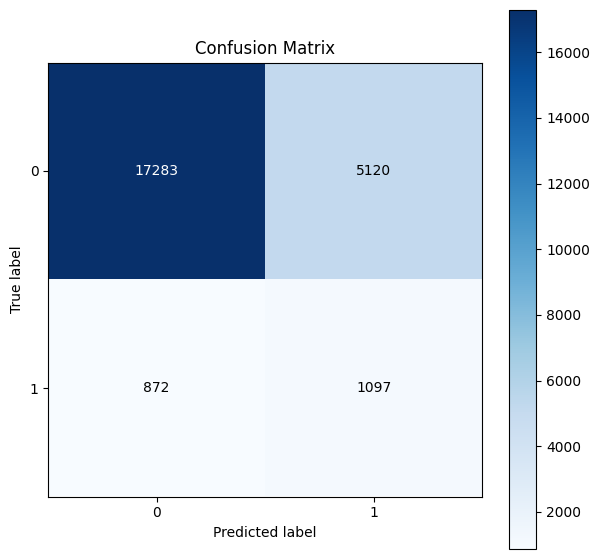

In [ ]:
yhat_test = clf_xgb.predict(X_test)

scikitplot.metrics.plot_confusion_matrix(y_test, yhat_test, figsize=(7,7))
plt.savefig("confusion_matrix.png")

test_accu = np.sum(y_test == yhat_test) / len(y_test) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(y_test, yhat_test))

##GridSerarchCV

In [ ]:
'''
model = xgb.XGBClassifier(objective='binary:logistic',
                            missing=1, seed=42,
                            eval_metric='auc')
n_estimators = range(50, 400, 50)
param_grid = {'n_estimators':n_estimators,
              'learning_rate':[0.1,0.01,0.05],
              'gamma':[0, 0.25, 1.0],
              'reg_lambda' : [0, 0.1, 1, 10.0],
              'scale_pos_weight' : [6, 12, 18, 50]
              }
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
'''

'\nmodel = xgb.XGBClassifier(objective=\'binary:logistic\',\n                            missing=1, seed=42,\n                            eval_metric=\'auc\')\nn_estimators = range(50, 400, 50)\nparam_grid = {\'n_estimators\':n_estimators,\n              \'learning_rate\':[0.1,0.01,0.05],\n              \'gamma\':[0, 0.25, 1.0],\n              \'reg_lambda\' : [0, 0.1, 1, 10.0],\n              \'scale_pos_weight\' : [6, 12, 18, 50]\n              }\nkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)\ngrid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(X_train, y_train)\n'

In [ ]:
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
'''
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
'''

'\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n print("%f (%f) with: %r" % (mean, stdev, param))\n'

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',
                          missing=0, seed=42,
                          eval_metric='auc',
                          gamma=0.25,
                          learning_rate=0.1,
                          n_estimators=250,
                          reg_lambda=1,
                          scale_pos_weight=11,
                          colsample_bytree=0.6,
                          early_stopping_rounds=10)

In [ ]:
model.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.69413
[1]	validation_0-auc:0.69955
[2]	validation_0-auc:0.70995
[3]	validation_0-auc:0.71436
[4]	validation_0-auc:0.71486
[5]	validation_0-auc:0.71174
[6]	validation_0-auc:0.71754
[7]	validation_0-auc:0.71536
[8]	validation_0-auc:0.71588
[9]	validation_0-auc:0.71489
[10]	validation_0-auc:0.71814
[11]	validation_0-auc:0.72106
[12]	validation_0-auc:0.72045
[13]	validation_0-auc:0.72214
[14]	validation_0-auc:0.72220
[15]	validation_0-auc:0.72288
[16]	validation_0-auc:0.72281
[17]	validation_0-auc:0.72312
[18]	validation_0-auc:0.72350
[19]	validation_0-auc:0.72391
[20]	validation_0-auc:0.72454
[21]	validation_0-auc:0.72440
[22]	validation_0-auc:0.72481
[23]	validation_0-auc:0.72522
[24]	validation_0-auc:0.72572
[25]	validation_0-auc:0.72578
[26]	validation_0-auc:0.72581
[27]	validation_0-auc:0.72605
[28]	validation_0-auc:0.72586
[29]	validation_0-auc:0.72618
[30]	validation_0-auc:0.72603
[31]	validation_0-auc:0.72613
[32]	validation_0-auc:0.72644
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

test accuracy: 73.5393 %


              precision    recall  f1-score   support

           0       0.95      0.75      0.84     22403
           1       0.17      0.58      0.26      1969

    accuracy                           0.74     24372
   macro avg       0.56      0.66      0.55     24372
weighted avg       0.89      0.74      0.79     24372



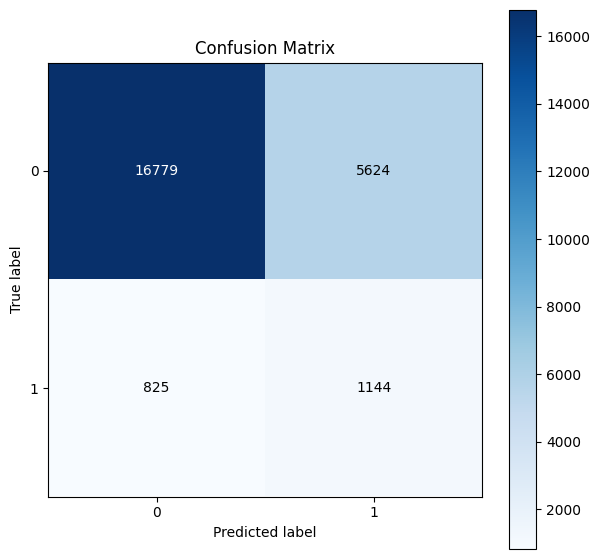

In [ ]:
yhat_test = model.predict(X_test)

scikitplot.metrics.plot_confusion_matrix(y_test, yhat_test, figsize=(7,7))
plt.savefig("confusion_matrix.png")

test_accu = np.sum(y_test == yhat_test) / len(y_test) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(y_test, yhat_test))

##Alternate Methods:

As XGBoost can handle missing data. Not handling missing data and feature selection

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Base_Problem_DataSet.xlsb')

In [ ]:
categorical_list = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [ ]:
object_to_float = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days', 'Identity_Age_in_Days', 'Enlistment_Period_in_Days', 'Rating_Origin_3']

In [ ]:
def convert_object_to_float(object_to_float):
  for col in object_to_float:
    list_=[]
    for i in range(df[col].shape[0]):
      val=0.0
      try:
        val = float(df[col].iloc[i])
      except:
        val = 0.0
      list_.append(val)
    df[col+'_float'] = list_

In [ ]:
convert_object_to_float(object_to_float)

In [ ]:
df = df.drop(object_to_float, axis=1)

####Frequence Encoding for Sort_of_Institution

In [ ]:
dict_Sort_of_Institution = df['Sort_of_Institution'].value_counts().to_dict()

In [ ]:
df['Sort_of_Institution'] = df['Sort_of_Institution'].map(dict_Sort_of_Institution)

In [ ]:
categorical = []
for i in df.columns:
  if df[i].nunique() < 7 or df[i].dtype=='O':
    categorical.append(i)

In [ ]:
categorical.remove('Default')

In [ ]:
categorical

['Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Cellphone_Marker',
 'Residential_Phone_Marker',
 'Employment_Phone_Operation',
 'Customer_Vocation',
 'Customer_Urban_Area_Ranking',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker']

In [ ]:
df = pd.get_dummies(df, columns=categorical)

In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_label = df['Default']
df = df.drop(['Default'] , axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.20, random_state=42, stratify=df_label)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97484, 87), (24372, 87), (97484,), (24372,))

In [ ]:
y_train.value_counts()

0    89608
1     7876
Name: Default, dtype: int64

In [ ]:
y_test.value_counts()

0    22403
1     1969
Name: Default, dtype: int64

In [ ]:
!pip install xgboost

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 87 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Offspring_Number                                  118218 non-null  float64
 1   Private_Dwelling_Duration                         41761 non-null   float64
 2   Patron_Kin_Count                                  119446 non-null  float64
 3   Request_Submission_Day                            119428 non-null  float64
 4   Request_Submission_Hour                           118193 non-null  float64
 5   Sort_of_Institution                               118247 non-null  float64
 6   Rating_Origin_1                                   53021 non-null   float64
 7   Rating_Origin_2                                   116170 non-null  float64
 8   Community_Non-Payment_Incidence                   59928 non-null   float64
 9   Tele

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',
                          missing=1, seed=42,
                          eval_metric='auc',
                          gamma=0.25,
                          learning_rate=0.1,
                          n_estimators=200,
                          reg_lambda=1,
                          scale_pos_weight=12,
                          colsample_bytree=0.6,
                          early_stopping_rounds=10,
                          subsample=0.9)

In [ ]:
model.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.67468
[1]	validation_0-auc:0.70342
[2]	validation_0-auc:0.70822
[3]	validation_0-auc:0.71667
[4]	validation_0-auc:0.71677
[5]	validation_0-auc:0.72329
[6]	validation_0-auc:0.72393
[7]	validation_0-auc:0.72503
[8]	validation_0-auc:0.72602
[9]	validation_0-auc:0.72908
[10]	validation_0-auc:0.73046
[11]	validation_0-auc:0.73069
[12]	validation_0-auc:0.73230
[13]	validation_0-auc:0.73350
[14]	validation_0-auc:0.73379
[15]	validation_0-auc:0.73344
[16]	validation_0-auc:0.73445
[17]	validation_0-auc:0.73519
[18]	validation_0-auc:0.73571
[19]	validation_0-auc:0.73610
[20]	validation_0-auc:0.73623
[21]	validation_0-auc:0.73615
[22]	validation_0-auc:0.73632
[23]	validation_0-auc:0.73663
[24]	validation_0-auc:0.73722
[25]	validation_0-auc:0.73779
[26]	validation_0-auc:0.73850
[27]	validation_0-auc:0.73873
[28]	validation_0-auc:0.73909
[29]	validation_0-auc:0.73939
[30]	validation_0-auc:0.74003
[31]	validation_0-auc:0.74056
[32]	validation_0-auc:0.74077
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

test accuracy: 75.1354 %


              precision    recall  f1-score   support

           0       0.96      0.76      0.85     22403
           1       0.19      0.61      0.29      1969

    accuracy                           0.75     24372
   macro avg       0.57      0.69      0.57     24372
weighted avg       0.90      0.75      0.80     24372



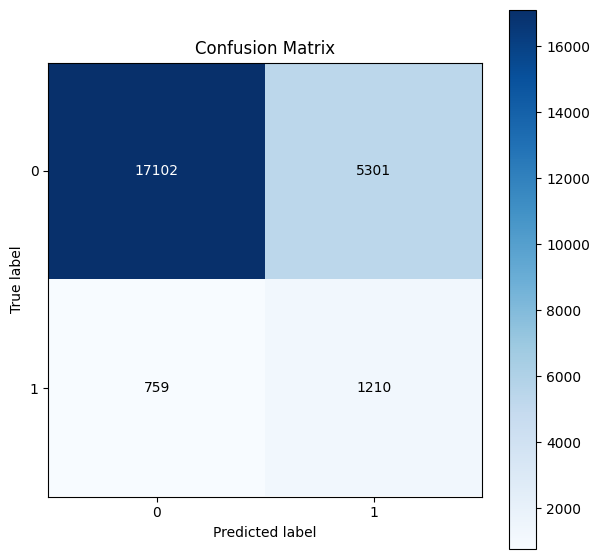

In [ ]:
yhat_test = model.predict(X_test)

scikitplot.metrics.plot_confusion_matrix(y_test, yhat_test, figsize=(7,7))
plt.savefig("confusion_matrix.png")

test_accu = np.sum(y_test == yhat_test) / len(y_test) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(y_test, yhat_test))

###Dropping rows that have more than 30% null values and seeing if they impact performance:

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Base_Problem_DataSet.xlsb')

In [ ]:
categorical_list = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [ ]:
object_to_float = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days', 'Identity_Age_in_Days', 'Enlistment_Period_in_Days', 'Rating_Origin_3']

In [ ]:
def convert_object_to_float(object_to_float):
  for col in object_to_float:
    list_=[]
    for i in range(df[col].shape[0]):
      val=0.0
      try:
        val = float(df[col].iloc[i])
      except:
        val = 0.0
      list_.append(val)
    df[col+'_float'] = list_

In [ ]:
convert_object_to_float(object_to_float)

In [ ]:
df = df.drop(object_to_float, axis=1)

In [ ]:
null_cols_drop = []
for i in df.columns:
  if df[i].isnull().mean() > 0.30:
    null_cols_drop.append(i)

In [ ]:
df = df.drop(null_cols_drop, axis=1)

In [ ]:
null_cols_drop

['Private_Dwelling_Duration',
 'Customer_Vocation',
 'Rating_Origin_1',
 'Community_Non-Payment_Incidence']

####Frequence Encoding

In [ ]:
dict_Sort_of_Institution = df['Sort_of_Institution'].value_counts().to_dict()

In [ ]:
df['Sort_of_Institution'] = df['Sort_of_Institution'].map(dict_Sort_of_Institution)

In [ ]:
categorical.remove('Customer_Vocation')

In [ ]:
df = pd.get_dummies(df, columns=categorical)

In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_label = df['Default']
df = df.drop(['Default'] , axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.20, random_state=42, stratify=df_label)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97484, 66), (24372, 66), (97484,), (24372,))

In [ ]:
y_train.value_counts()

0    89608
1     7876
Name: Default, dtype: int64

In [ ]:
y_test.value_counts()

0    22403
1     1969
Name: Default, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 66 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Offspring_Number                                  118218 non-null  float64
 1   Patron_Kin_Count                                  119446 non-null  float64
 2   Request_Submission_Day                            119428 non-null  float64
 3   Request_Submission_Hour                           118193 non-null  float64
 4   Sort_of_Institution                               118247 non-null  float64
 5   Rating_Origin_2                                   116170 non-null  float64
 6   Telecommunication_Switch                          118192 non-null  float64
 7   Solvency_Information_Agency                       103316 non-null  float64
 8   Patron_Salary_float                               118249 non-null  float64
 9   Loan

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',
                          seed=42,
                          eval_metric='auc',
                          gamma=0.25,
                          learning_rate=0.1,
                          n_estimators=200,
                          reg_lambda=1,
                          scale_pos_weight=12,
                          colsample_bytree=0.7,
                          early_stopping_rounds=10,
                          subsample=1)

In [ ]:
model.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.67373
[1]	validation_0-auc:0.70227
[2]	validation_0-auc:0.70831
[3]	validation_0-auc:0.71030
[4]	validation_0-auc:0.71217
[5]	validation_0-auc:0.71162
[6]	validation_0-auc:0.71490
[7]	validation_0-auc:0.71504
[8]	validation_0-auc:0.71547
[9]	validation_0-auc:0.71732
[10]	validation_0-auc:0.71819
[11]	validation_0-auc:0.71902
[12]	validation_0-auc:0.72023
[13]	validation_0-auc:0.72018
[14]	validation_0-auc:0.71984
[15]	validation_0-auc:0.72040
[16]	validation_0-auc:0.72074
[17]	validation_0-auc:0.72170
[18]	validation_0-auc:0.72205
[19]	validation_0-auc:0.72272
[20]	validation_0-auc:0.72345
[21]	validation_0-auc:0.72447
[22]	validation_0-auc:0.72527
[23]	validation_0-auc:0.72564
[24]	validation_0-auc:0.72641
[25]	validation_0-auc:0.72667
[26]	validation_0-auc:0.72688
[27]	validation_0-auc:0.72800
[28]	validation_0-auc:0.72809
[29]	validation_0-auc:0.72829
[30]	validation_0-auc:0.72837
[31]	validation_0-auc:0.72848
[32]	validation_0-auc:0.72909
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

test accuracy: 72.3166 %


              precision    recall  f1-score   support

           0       0.96      0.73      0.83     22403
           1       0.17      0.62      0.27      1969

    accuracy                           0.72     24372
   macro avg       0.56      0.68      0.55     24372
weighted avg       0.89      0.72      0.78     24372



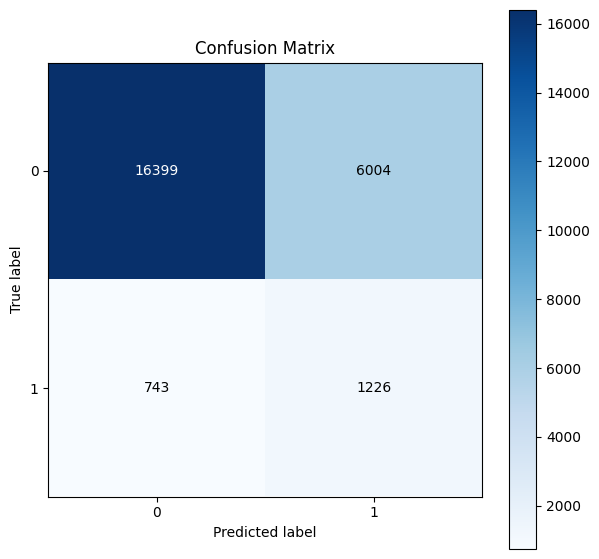

In [ ]:
yhat_test = model.predict(X_test)

scikitplot.metrics.plot_confusion_matrix(y_test, yhat_test, figsize=(7,7))
plt.savefig("confusion_matrix.png")

test_accu = np.sum(y_test == yhat_test) / len(y_test) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(y_test, yhat_test))

###Seeing if less number of features gets better result

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Base_Problem_DataSet.xlsb')

In [ ]:
categorical_list = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [ ]:
object_to_float = ['Patron_Salary', 'Loan_Capital', 'Borrowing_Periodic_Payment', 'Population_Fraction_by_Region', 'Elderliness_in_Days', 'Work_Duration_in_Days', 'Identity_Age_in_Days', 'Enlistment_Period_in_Days', 'Rating_Origin_3']

In [ ]:
def convert_object_to_float(object_to_float):
  for col in object_to_float:
    list_=[]
    for i in range(df[col].shape[0]):
      val=0.0
      try:
        val = float(df[col].iloc[i])
      except:
        val = 0.0
      list_.append(val)
    df[col+'_float'] = list_

In [ ]:
convert_object_to_float(object_to_float)

In [ ]:
df = df.drop(object_to_float, axis=1)

In [ ]:
null_cols_drop = []
for i in df.columns:
  if df[i].isnull().mean() > 0.30:
    null_cols_drop.append(i)

In [ ]:
df = df.drop(null_cols_drop, axis=1)

In [ ]:
null_cols_drop

['Private_Dwelling_Duration',
 'Customer_Vocation',
 'Rating_Origin_1',
 'Community_Non-Payment_Incidence']

####Frequence Encoding

In [ ]:
dict_Sort_of_Institution = df['Sort_of_Institution'].value_counts().to_dict()

In [ ]:
df['Sort_of_Institution'] = df['Sort_of_Institution'].map(dict_Sort_of_Institution)

In [ ]:
categorical = []
for i in df.columns:
  if df[i].nunique() < 7 or df[i].dtype=='O':
    categorical.append(i)

In [ ]:
categorical.remove('Default')

In [ ]:
categorical

['Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Customer_Revenue_Category',
 'Patron_Academic_Qualification',
 'Customer_Conjugal_State',
 'Patron_Sex',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Cellphone_Marker',
 'Residential_Phone_Marker',
 'Employment_Phone_Operation',
 'Customer_Urban_Area_Ranking',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker']

In [ ]:
categorical_imp = ['Patron_Sex','Customer_Revenue_Category','Patron_Academic_Qualification']

In [ ]:
num_categorical_imp = ['Solvency_Information_Agency', 'Customer_Urban_Area_Ranking', 'Employment_Phone_Operation']

In [ ]:
for i in categorical_imp:
  if i in categorical:
    categorical.remove(i)
for i in num_categorical_imp:
  if i in categorical:
    categorical.remove(i)

In [ ]:
categorical

['Automobile_Possession',
 'Two-Wheeler_Ownership',
 'Ongoing_Borrowing',
 'Residence_Proprietorship',
 'Customer_Conjugal_State',
 'Borrowing_Agreement_Category',
 'Customer_Living_Arrangement',
 'Cellphone_Marker',
 'Residential_Phone_Marker',
 'Patron_Constant_Correspondence_Marker',
 'Customer_Professional_Communication_Marker']

In [ ]:
df = df.drop(categorical, axis=1)

In [ ]:
df = pd.get_dummies(df, columns=categorical_imp)

In [ ]:
df = pd.get_dummies(df, columns=num_categorical_imp)

In [ ]:
df = df.drop(['Borrowing_Periodic_Payment_float','Elderliness_in_Days_float'], axis=1)

In [ ]:
df = df.drop('ID', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_label = df['Default']
df = df.drop(['Default'] , axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.20, random_state=42, stratify=df_label)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97484, 56), (24372, 56), (97484,), (24372,))

In [ ]:
y_train.value_counts()

0    89608
1     7876
Name: Default, dtype: int64

In [ ]:
y_test.value_counts()

0    22403
1     1969
Name: Default, dtype: int64

In [ ]:
df.isnull().mean()

Offspring_Number                                    0.029855
Patron_Kin_Count                                    0.019777
Request_Submission_Day                              0.019925
Request_Submission_Hour                             0.030060
Sort_of_Institution                                 0.029617
Rating_Origin_2                                     0.046662
Telecommunication_Switch                            0.030068
Patron_Salary_float                                 0.029601
Loan_Capital_float                                  0.029806
Population_Fraction_by_Region_float                 0.039859
Work_Duration_in_Days_float                         0.029945
Identity_Age_in_Days_float                          0.048976
Enlistment_Period_in_Days_float                     0.029658
Rating_Origin_3_float                               0.220925
Patron_Sex_Female                                   0.000000
Patron_Sex_Male                                     0.000000
Patron_Sex_XNA          

In [ ]:
model = xgb.XGBClassifier(objective='binary:logistic',
                          seed=42,
                          eval_metric='auc',
                          gamma=0.25,
                          learning_rate=0.05,
                          n_estimators=250,
                          reg_lambda=1,
                          scale_pos_weight=12,
                          colsample_bytree=0.7,
                          early_stopping_rounds=10,
                          subsample=1,
                          device='cuda')

In [ ]:
model.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test,y_test)])

[0]	validation_0-auc:0.69331
[1]	validation_0-auc:0.69782
[2]	validation_0-auc:0.70586


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:09:06] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


[3]	validation_0-auc:0.70781
[4]	validation_0-auc:0.70819
[5]	validation_0-auc:0.71027
[6]	validation_0-auc:0.71143
[7]	validation_0-auc:0.71460
[8]	validation_0-auc:0.71705
[9]	validation_0-auc:0.71863
[10]	validation_0-auc:0.71908
[11]	validation_0-auc:0.72028
[12]	validation_0-auc:0.72098
[13]	validation_0-auc:0.72114
[14]	validation_0-auc:0.72149
[15]	validation_0-auc:0.72084
[16]	validation_0-auc:0.72093
[17]	validation_0-auc:0.72095
[18]	validation_0-auc:0.72058
[19]	validation_0-auc:0.72084
[20]	validation_0-auc:0.72158
[21]	validation_0-auc:0.72196
[22]	validation_0-auc:0.72196
[23]	validation_0-auc:0.72220
[24]	validation_0-auc:0.72227
[25]	validation_0-auc:0.72213
[26]	validation_0-auc:0.72236
[27]	validation_0-auc:0.72260
[28]	validation_0-auc:0.72240
[29]	validation_0-auc:0.72267
[30]	validation_0-auc:0.72241
[31]	validation_0-auc:0.72231
[32]	validation_0-auc:0.72268
[33]	validation_0-auc:0.72293
[34]	validation_0-auc:0.72342
[35]	validation_0-auc:0.72358
[36]	validation_0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device='cuda', early_stopping_rounds=10,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

test accuracy: 70.2979 %


              precision    recall  f1-score   support

           0       0.96      0.71      0.81     22403
           1       0.16      0.64      0.26      1969

    accuracy                           0.70     24372
   macro avg       0.56      0.67      0.54     24372
weighted avg       0.89      0.70      0.77     24372



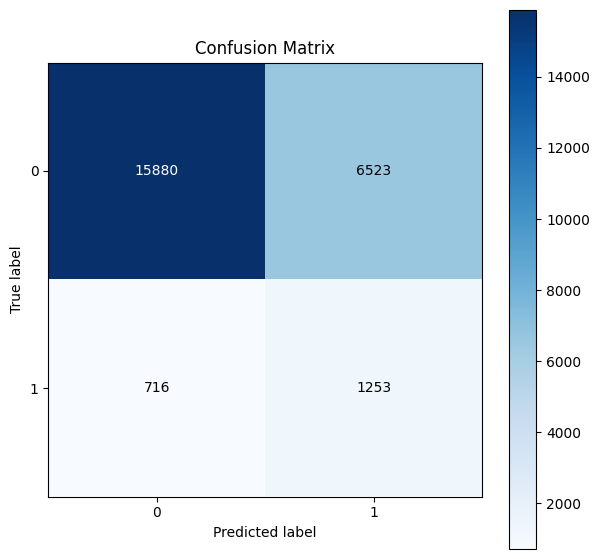

In [ ]:
yhat_test = model.predict(X_test)

scikitplot.metrics.plot_confusion_matrix(y_test, yhat_test, figsize=(7,7))
plt.savefig("confusion_matrix.png")

test_accu = np.sum(y_test == yhat_test) / len(y_test) * 100
print(f"test accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(y_test, yhat_test))

##"Non-Payment" risk level

In [ ]:
yhat_test = model.predict_proba(X_test)

In [ ]:
yhat_test

array([[0.5004307 , 0.4995693 ],
       [0.48547298, 0.514527  ],
       [0.752805  , 0.24719498],
       ...,
       [0.7433388 , 0.2566612 ],
       [0.7591262 , 0.24087381],
       [0.6456089 , 0.35439113]], dtype=float32)

In [ ]:
#The first value of yhat_test gives the probability of loan not defaulting, the second value gives the probability of loan defaulting.

#Conclusion:


1. **Highly Imbalanced Data**: The dataset under consideration is imbalanced, with the majority class (0) representing 92% of the data and the minority class (1) representing only 8%. This means that there's a significant class imbalance in the data, which can impact the performance of machine learning models.

2. **Objective: High Recall**: The primary objective of this analysis is to achieve a high recall, particularly for the cases where "loan default" is true. Recall is a metric used to measure the model's ability to identify all relevant instances (i.e., true positives) among the actual positive instances.

3. **Recall Achieved**: The analysis resulted in a recall of 64%. This means that out of all the actual loan default cases, the model correctly identified 64% of them, which is considered a high recall.

4. **Handling Imbalanced Data**: To address the issue of imbalanced data, the approach taken was to use the *scale_pos_weight* hyperparameter of the XGBoost model during the training process. This hyperparameter allows for the severe penalization of misclassifications of the minority class (1). By doing so, the model is encouraged to focus more on correctly identifying and predicting the minority class instances, which is particularly important in situations with imbalanced data.

In summary, the key takeaway is that the analysis aimed to achieve a high recall for loan default cases, and this was successfully accomplished using the *scale_pos_weight* hyperparameter in the XGBoost model to mitigate the impact of imbalanced data.